In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import stats
from sklearn.linear_model import LinearRegression
import plotly.express as px
from scipy.stats import normaltest

Exploration Data 

In [2]:
df=pd.read_csv('Boat price.csv')
df

Unnamed: 0       id   type             boatClass         make  \
0               1  7252689  power          power-center    Aquasport   
1               3  7228300  power    power-sportcruiser      Formula   
2               5  7271336  power            power-deck     Bayliner   
3               6  7222952  power  power-expresscruiser        Regal   
4               8  6824832  power             power-aft       Carver   
...           ...      ...    ...                   ...          ...   
18898       19996  7127945  power         power-pontoon  Silver Wave   
18899       19997  7110910  power        power-runabout       Rinker   
18900       19998  6935123  power             power-bay       Blazer   
18901       19999  7079181  power         power-pontoon        Aloha   
18902       20000  7140924  power         power-cruiser     Bayliner   

                           model  year condition  length_ft  beam_ft  ...  \
0                         210 CC  1992      used      21.00     8.50  ...   
1                400 Super Sport  2018      used      40.00    11.00  ...   
2                    Element 180  2020       new      18.00     7.42  ...   
3                     32 Express  2015      used      32.00    10.33  ...   
4      440 Aft Cabin Motor Yacht  1994      used      44.00    15.00  ...   
...                          ...   ...       ...        ...      ...  ...   
18898                   250 Play  2013      used      25.00     8.50  ...   
18899            Captiva 200 MTX  2013      used      19.33     8.00  ...   
18900                       2200  2019       new      22.00     7.67  ...   
18901                        250  2004      used      25.00     8.50  ...   
18902                 2655 Ciera  2002       new      26.58     9.42  ...   

       minEngineYear    engineCategory     price  sellerId              city  \
0                NaN       outboard-4s   16500.0    217053         Englewood   
1             2018.0  inboard-outboard  539000.0     44260    Harsens Island   
2             2019.0       outboard-4s   26995.0    220570          Marietta   
3                NaN          multiple  169995.0     34834  North Charleston   
4             1994.0           inboard  109900.0     17942      Middle River   
...              ...               ...       ...       ...               ...   
18898            NaN               NaN   31973.0     34647           Acworth   
18899            NaN               NaN   26995.0      6335     New Baltimore   
18900            NaN               NaN   39995.0     65602          Seabrook   
18901            NaN               NaN   16900.0      3180     Sunrise Beach   
18902         2002.0  inboard-outboard   17900.0    152266       Gainesville   

       state    zip created_date  created_month  created_year  
0         FL  34224   2019-10-16             10          2019  
1         MI  48028   2019-09-24              9          2019  
2         OH  45750   2019-11-02             11          2019  
3         SC  29405   2019-09-19              9          2019  
4         MD  21220   2018-08-29              8          2018  
...      ...    ...          ...            ...           ...  
18898     GA  30102   2019-06-25              6          2019  
18899     MI  48047   2019-06-12              6          2019  
18900     TX  77586   2018-12-12             12          2018  
18901     MO  65079   2019-05-10              5          2019  
18902     GA  30501   2019-07-08              7          2019  

[18903 rows x 26 columns]

In [3]:
df=df.drop(['id','Unnamed: 0'],axis=1)
df

type             boatClass         make                      model  \
0      power          power-center    Aquasport                     210 CC   
1      power    power-sportcruiser      Formula            400 Super Sport   
2      power            power-deck     Bayliner                Element 180   
3      power  power-expresscruiser        Regal                 32 Express   
4      power             power-aft       Carver  440 Aft Cabin Motor Yacht   
...      ...                   ...          ...                        ...   
18898  power         power-pontoon  Silver Wave                   250 Play   
18899  power        power-runabout       Rinker            Captiva 200 MTX   
18900  power             power-bay       Blazer                       2200   
18901  power         power-pontoon        Aloha                        250   
18902  power         power-cruiser     Bayliner                 2655 Ciera   

       year condition  length_ft  beam_ft  dryWeight_lb hullMaterial  ...  \
0      1992      used      21.00     8.50        3000.0   fiberglass  ...   
1      2018      used      40.00    11.00       16100.0   fiberglass  ...   
2      2020       new      18.00     7.42        2000.0   fiberglass  ...   
3      2015      used      32.00    10.33       12650.0   fiberglass  ...   
4      1994      used      44.00    15.00       32000.0   fiberglass  ...   
...     ...       ...        ...      ...           ...          ...  ...   
18898  2013      used      25.00     8.50           NaN     aluminum  ...   
18899  2013      used      19.33     8.00        2795.0   fiberglass  ...   
18900  2019       new      22.00     7.67           NaN   fiberglass  ...   
18901  2004      used      25.00     8.50           NaN     aluminum  ...   
18902  2002       new      26.58     9.42        6350.0   fiberglass  ...   

      minEngineYear    engineCategory     price  sellerId              city  \
0               NaN       outboard-4s   16500.0    217053         Englewood   
1            2018.0  inboard-outboard  539000.0     44260    Harsens Island   
2            2019.0       outboard-4s   26995.0    220570          Marietta   
3               NaN          multiple  169995.0     34834  North Charleston   
4            1994.0           inboard  109900.0     17942      Middle River   
...             ...               ...       ...       ...               ...   
18898           NaN               NaN   31973.0     34647           Acworth   
18899           NaN               NaN   26995.0      6335     New Baltimore   
18900           NaN               NaN   39995.0     65602          Seabrook   
18901           NaN               NaN   16900.0      3180     Sunrise Beach   
18902        2002.0  inboard-outboard   17900.0    152266       Gainesville   

      state    zip  created_date created_month created_year  
0        FL  34224    2019-10-16            10         2019  
1        MI  48028    2019-09-24             9         2019  
2        OH  45750    2019-11-02            11         2019  
3        SC  29405    2019-09-19             9         2019  
4        MD  21220    2018-08-29             8         2018  
...     ...    ...           ...           ...          ...  
18898    GA  30102    2019-06-25             6         2019  
18899    MI  48047    2019-06-12             6         2019  
18900    TX  77586    2018-12-12            12         2018  
18901    MO  65079    2019-05-10             5         2019  
18902    GA  30501    2019-07-08             7         2019  

[18903 rows x 24 columns]

In [4]:
colon_order=['type', 'boatClass', 'make', 'model', 'year', 'condition', 'length_ft',
       'beam_ft', 'dryWeight_lb', 'hullMaterial', 'fuelType', 'numEngines',
       'totalHP', 'maxEngineYear', 'minEngineYear', 'engineCategory', 'created_year',
       'sellerId', 'city', 'state', 'zip', 'created_date', 'created_month',
       'price']
df=df[colon_order]
df

type             boatClass         make                      model  \
0      power          power-center    Aquasport                     210 CC   
1      power    power-sportcruiser      Formula            400 Super Sport   
2      power            power-deck     Bayliner                Element 180   
3      power  power-expresscruiser        Regal                 32 Express   
4      power             power-aft       Carver  440 Aft Cabin Motor Yacht   
...      ...                   ...          ...                        ...   
18898  power         power-pontoon  Silver Wave                   250 Play   
18899  power        power-runabout       Rinker            Captiva 200 MTX   
18900  power             power-bay       Blazer                       2200   
18901  power         power-pontoon        Aloha                        250   
18902  power         power-cruiser     Bayliner                 2655 Ciera   

       year condition  length_ft  beam_ft  dryWeight_lb hullMaterial  ...  \
0      1992      used      21.00     8.50        3000.0   fiberglass  ...   
1      2018      used      40.00    11.00       16100.0   fiberglass  ...   
2      2020       new      18.00     7.42        2000.0   fiberglass  ...   
3      2015      used      32.00    10.33       12650.0   fiberglass  ...   
4      1994      used      44.00    15.00       32000.0   fiberglass  ...   
...     ...       ...        ...      ...           ...          ...  ...   
18898  2013      used      25.00     8.50           NaN     aluminum  ...   
18899  2013      used      19.33     8.00        2795.0   fiberglass  ...   
18900  2019       new      22.00     7.67           NaN   fiberglass  ...   
18901  2004      used      25.00     8.50           NaN     aluminum  ...   
18902  2002       new      26.58     9.42        6350.0   fiberglass  ...   

      minEngineYear    engineCategory  created_year  sellerId  \
0               NaN       outboard-4s          2019    217053   
1            2018.0  inboard-outboard          2019     44260   
2            2019.0       outboard-4s          2019    220570   
3               NaN          multiple          2019     34834   
4            1994.0           inboard          2018     17942   
...             ...               ...           ...       ...   
18898           NaN               NaN          2019     34647   
18899           NaN               NaN          2019      6335   
18900           NaN               NaN          2018     65602   
18901           NaN               NaN          2019      3180   
18902        2002.0  inboard-outboard          2019    152266   

                   city state    zip  created_date created_month     price  
0             Englewood    FL  34224    2019-10-16            10   16500.0  
1        Harsens Island    MI  48028    2019-09-24             9  539000.0  
2              Marietta    OH  45750    2019-11-02            11   26995.0  
3      North Charleston    SC  29405    2019-09-19             9  169995.0  
4          Middle River    MD  21220    2018-08-29             8  109900.0  
...                 ...   ...    ...           ...           ...       ...  
18898           Acworth    GA  30102    2019-06-25             6   31973.0  
18899     New Baltimore    MI  48047    2019-06-12             6   26995.0  
18900          Seabrook    TX  77586    2018-12-12            12   39995.0  
18901     Sunrise Beach    MO  65079    2019-05-10             5   16900.0  
18902       Gainesville    GA  30501    2019-07-08             7   17900.0  

[18903 rows x 24 columns]

In [5]:
df.isnull().sum()

type                  0
boatClass             0
make                  0
model                35
year                  0
condition             0
length_ft             0
beam_ft            6504
dryWeight_lb      11809
hullMaterial          0
fuelType           2952
numEngines            0
totalHP             848
maxEngineYear     16698
minEngineYear     16729
engineCategory    10493
created_year          0
sellerId              0
city                 56
state                 0
zip                8688
created_date          0
created_month         0
price                 0
dtype: int64

In [8]:
df.dtypes

type               object
boatClass          object
make               object
model              object
year                int64
condition          object
length_ft         float64
beam_ft           float64
dryWeight_lb      float64
hullMaterial       object
fuelType           object
numEngines          int64
totalHP           float64
maxEngineYear     float64
minEngineYear     float64
engineCategory     object
created_year        int64
sellerId            int64
city               object
state              object
zip                object
created_date       object
created_month       int64
price             float64
dtype: object

In [152]:
df_num=df.select_dtypes(include='number')
df_cat=df.select_dtypes(exclude='number')

In [7]:
df_cat

type             boatClass         make                      model  \
0      power          power-center    Aquasport                     210 CC   
1      power    power-sportcruiser      Formula            400 Super Sport   
2      power            power-deck     Bayliner                Element 180   
3      power  power-expresscruiser        Regal                 32 Express   
4      power             power-aft       Carver  440 Aft Cabin Motor Yacht   
...      ...                   ...          ...                        ...   
18898  power         power-pontoon  Silver Wave                   250 Play   
18899  power        power-runabout       Rinker            Captiva 200 MTX   
18900  power             power-bay       Blazer                       2200   
18901  power         power-pontoon        Aloha                        250   
18902  power         power-cruiser     Bayliner                 2655 Ciera   

      condition hullMaterial  fuelType    engineCategory              city  \
0          used   fiberglass  gasoline       outboard-4s         Englewood   
1          used   fiberglass    diesel  inboard-outboard    Harsens Island   
2           new   fiberglass  gasoline       outboard-4s          Marietta   
3          used   fiberglass  gasoline          multiple  North Charleston   
4          used   fiberglass    diesel           inboard      Middle River   
...         ...          ...       ...               ...               ...   
18898      used     aluminum  gasoline               NaN           Acworth   
18899      used   fiberglass  gasoline               NaN     New Baltimore   
18900       new   fiberglass  gasoline               NaN          Seabrook   
18901      used     aluminum  gasoline               NaN     Sunrise Beach   
18902       new   fiberglass  gasoline  inboard-outboard       Gainesville   

      state    zip created_date  
0        FL  34224   2019-10-16  
1        MI  48028   2019-09-24  
2        OH  45750   2019-11-02  
3        SC  29405   2019-09-19  
4        MD  21220   2018-08-29  
...     ...    ...          ...  
18898    GA  30102   2019-06-25  
18899    MI  48047   2019-06-12  
18900    TX  77586   2018-12-12  
18901    MO  65079   2019-05-10  
18902    GA  30501   2019-07-08  

[18903 rows x 12 columns]

Number Colon Exploration

In [8]:
df_num

year  length_ft  beam_ft  dryWeight_lb  numEngines  totalHP  \
0      1992      21.00     8.50        3000.0           1    150.0   
1      2018      40.00    11.00       16100.0           2    800.0   
2      2020      18.00     7.42        2000.0           1     75.0   
3      2015      32.00    10.33       12650.0           2    600.0   
4      1994      44.00    15.00       32000.0           2    700.0   
...     ...        ...      ...           ...         ...      ...   
18898  2013      25.00     8.50           NaN           0      NaN   
18899  2013      19.33     8.00        2795.0           1      0.0   
18900  2019      22.00     7.67           NaN           0      NaN   
18901  2004      25.00     8.50           NaN           0      NaN   
18902  2002      26.58     9.42        6350.0           1    220.0   

       maxEngineYear  minEngineYear  created_year  sellerId  created_month  \
0                NaN            NaN          2019    217053             10   
1             2018.0         2018.0          2019     44260              9   
2             2019.0         2019.0          2019    220570             11   
3                NaN            NaN          2019     34834              9   
4             1994.0         1994.0          2018     17942              8   
...              ...            ...           ...       ...            ...   
18898            NaN            NaN          2019     34647              6   
18899            NaN            NaN          2019      6335              6   
18900            NaN            NaN          2018     65602             12   
18901            NaN            NaN          2019      3180              5   
18902         2002.0         2002.0          2019    152266              7   

          price  
0       16500.0  
1      539000.0  
2       26995.0  
3      169995.0  
4      109900.0  
...         ...  
18898   31973.0  
18899   26995.0  
18900   39995.0  
18901   16900.0  
18902   17900.0  

[18903 rows x 12 columns]

In [12]:
df_num.describe().T

count           mean           std      min       25%  \
year           18903.0    2013.145956  1.050299e+01  1910.00   2011.00   
length_ft      18903.0      23.803935  1.461333e+01     1.00     18.00   
beam_ft        12399.0      16.196930  3.683357e+01     0.08      7.83   
dryWeight_lb    7094.0    4754.142697  1.162638e+04     8.00   1175.00   
numEngines     18903.0       1.069513  4.255279e-01     0.00      1.00   
totalHP        18055.0     112.849006  2.861376e+02     0.00      0.00   
maxEngineYear   2205.0    2007.927438  1.242915e+01  1938.00   2001.00   
minEngineYear   2174.0    2007.919503  1.246250e+01  1938.00   2001.00   
created_year   18903.0    2018.503465  1.093103e+00  2003.00   2018.00   
sellerId       18903.0   49891.652225  6.072559e+04  1003.00  10550.00   
created_month  18903.0       6.945511  3.007115e+00     1.00      5.00   
price          18903.0  647146.880930  7.309567e+07   500.00  19255.00   

                   50%      75%           max  
year            2019.0   2019.0  2.020000e+03  
length_ft         21.0     25.0  3.750000e+02  
beam_ft            8.5      9.0  1.311000e+03  
dryWeight_lb    2001.0   3375.0  4.400000e+05  
numEngines         1.0      1.0  4.000000e+00  
totalHP            0.0    115.0  7.200000e+03  
maxEngineYear   2012.0   2019.0  2.020000e+03  
minEngineYear   2012.0   2019.0  2.020000e+03  
created_year    2019.0   2019.0  2.019000e+03  
sellerId       34482.0  53226.0  2.695570e+05  
created_month      8.0      9.0  1.200000e+01  
price          34195.0  57830.0  1.000000e+10

In [13]:
df_num.isnull().sum()

year                 0
length_ft            0
beam_ft           6504
dryWeight_lb     11809
numEngines           0
totalHP            848
maxEngineYear    16698
minEngineYear    16729
created_year         0
sellerId             0
created_month        0
price                0
dtype: int64

In [9]:
df_numa=df_num.copy()




In [10]:
def Hist(df_numa,nrow,ncol):
    fig,axes=plt.subplots(nrow,ncol,figsize=(nrow*5,ncol*10))

    for i , col in enumerate(df_numa.columns):
        row_index = i // ncol
        col_index = i % ncol
        ax = axes[row_index, col_index]
        
        g=sns.histplot(x=df_numa[col],kde=True,data=df_numa,ax=ax)
        g.set(title=(f"{col} Disturbition Grapf"),xlabel=(f"{col}"),ylabel=('Disturbition'))
        
        if df_numa[col].isnull().any():
            median=df_numa[col].median()
            null_number=df_num[col].isnull().sum()
            text_str=(
                  f"Median:{median:.1f}\n"
                  f"Null Number:{null_number}\n")
            g.text(0.95, 0.95, text_str, transform=g.transAxes,
                 fontsize=10, verticalalignment='top', horizontalalignment='right',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        else:
            mu,sigma=sts.norm.fit(df_numa[col])
            stat,p=normaltest(df_numa[col])
            median=df_numa[col].median()
            null_number=df_num[col].isnull().sum()
            text_str=(f"Mu:{mu:.1f},Sigma:{sigma:.1f}\n"
                  f"P_value:{p:.2f}\n"
                  f"Median:{median:.1f}\n"
                  f"Null Number:{null_number}\n")
            g.text(0.95, 0.95, text_str, transform=g.transAxes,
                 fontsize=10, verticalalignment='top', horizontalalignment='right',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
    plt.tight_layout()
    plt.show()

KeyboardInterrupt: 

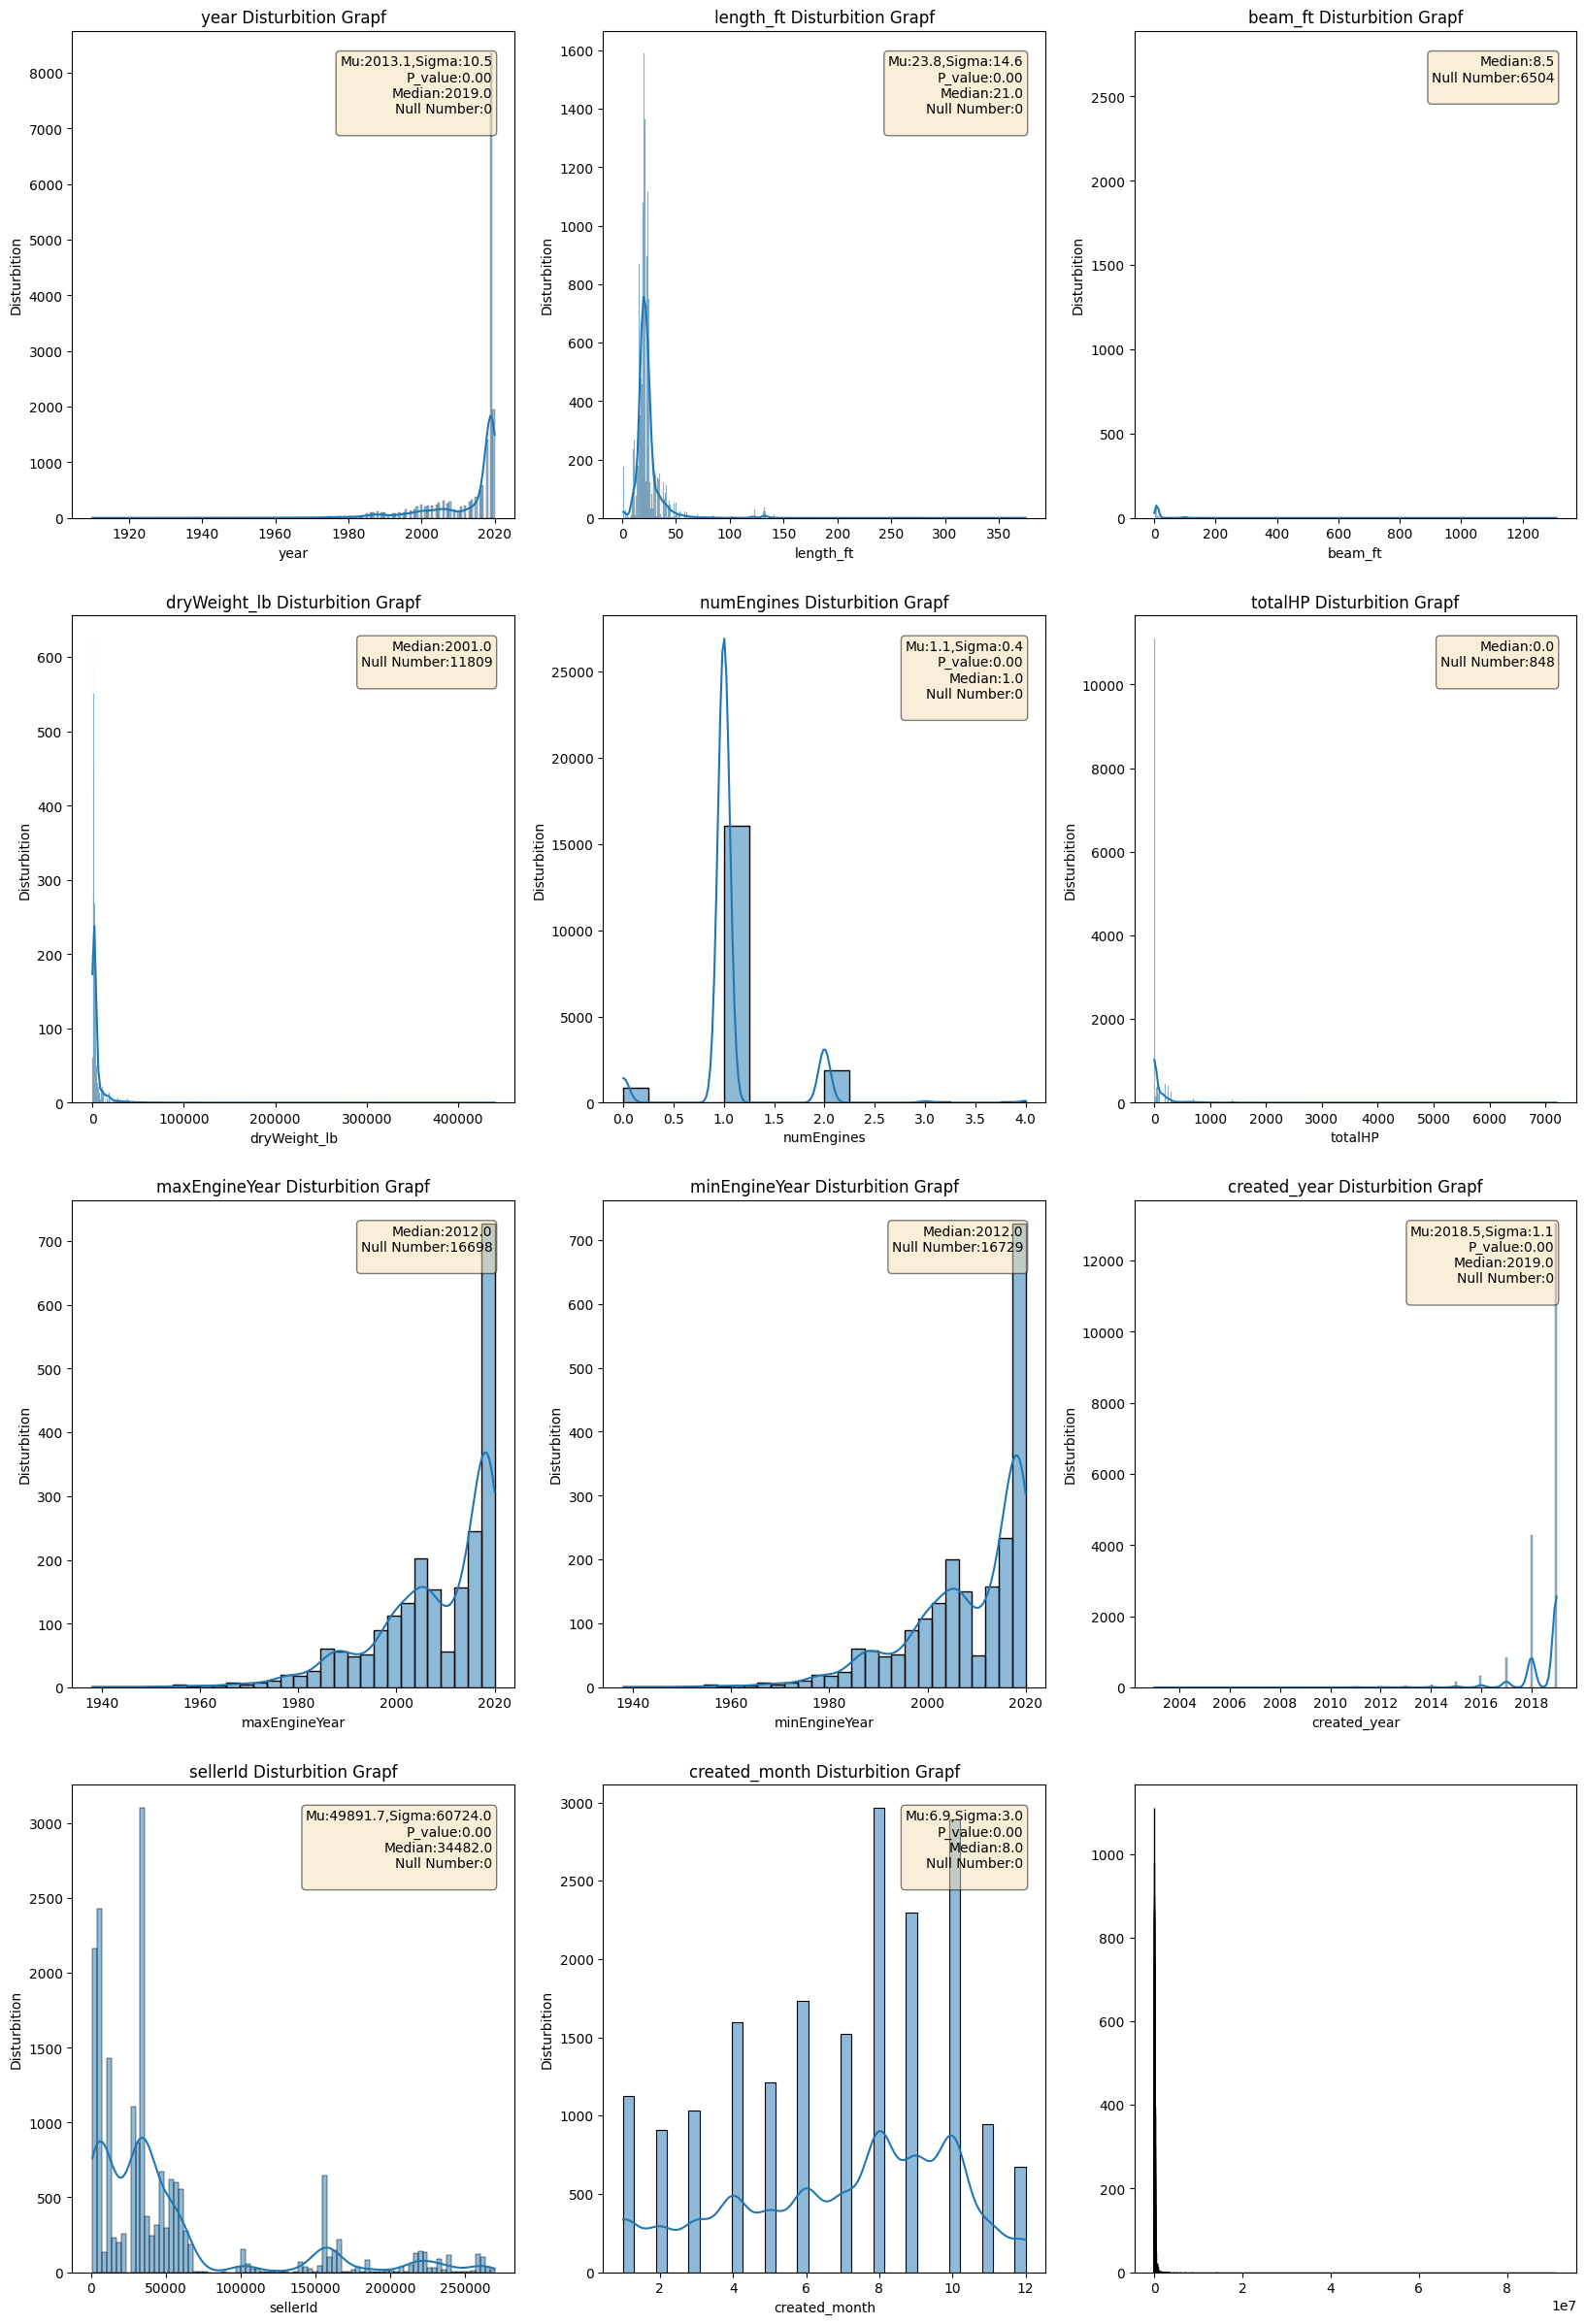

In [69]:
Hist(df_numa,4,3)

In [13]:
def box(df_num,nrow,ncol):
    fig,axes=plt.subplots(nrow,ncol,figsize=(nrow*5,ncol*10))

    for i , col in enumerate(df_num.columns):
        row_index = i // ncol
        col_index = i % ncol
        ax = axes[row_index, col_index]
        
        g=sns.boxplot(x=df_num[col],data=df_num,ax=ax)
        g.set(title=(f"{col} Box Grapf"),xlabel=(f"{col}"),ylabel=('Disturbition'))
        Q1=df_num[col].quantile(0.25)
        Q3=df_num[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = np.sum((df_num[col] < lower_bound) | (df_num[col] > upper_bound))
        median=df_num[col].median()
        
        text_str=(f"Median:{median:.2f}\n"
              f"IQR:{IQR:.1f}\n"
              f"Lower Bound:{lower_bound:.1f}\n"
              f"Upper Bound:{upper_bound:.1f}\n"
              f"Outliers Number:{outliers}\n")
        g.text(0.95, 0.95, text_str, transform=g.transAxes,
                fontsize=15, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat'))
    
    plt.tight_layout()
    plt.show()
    

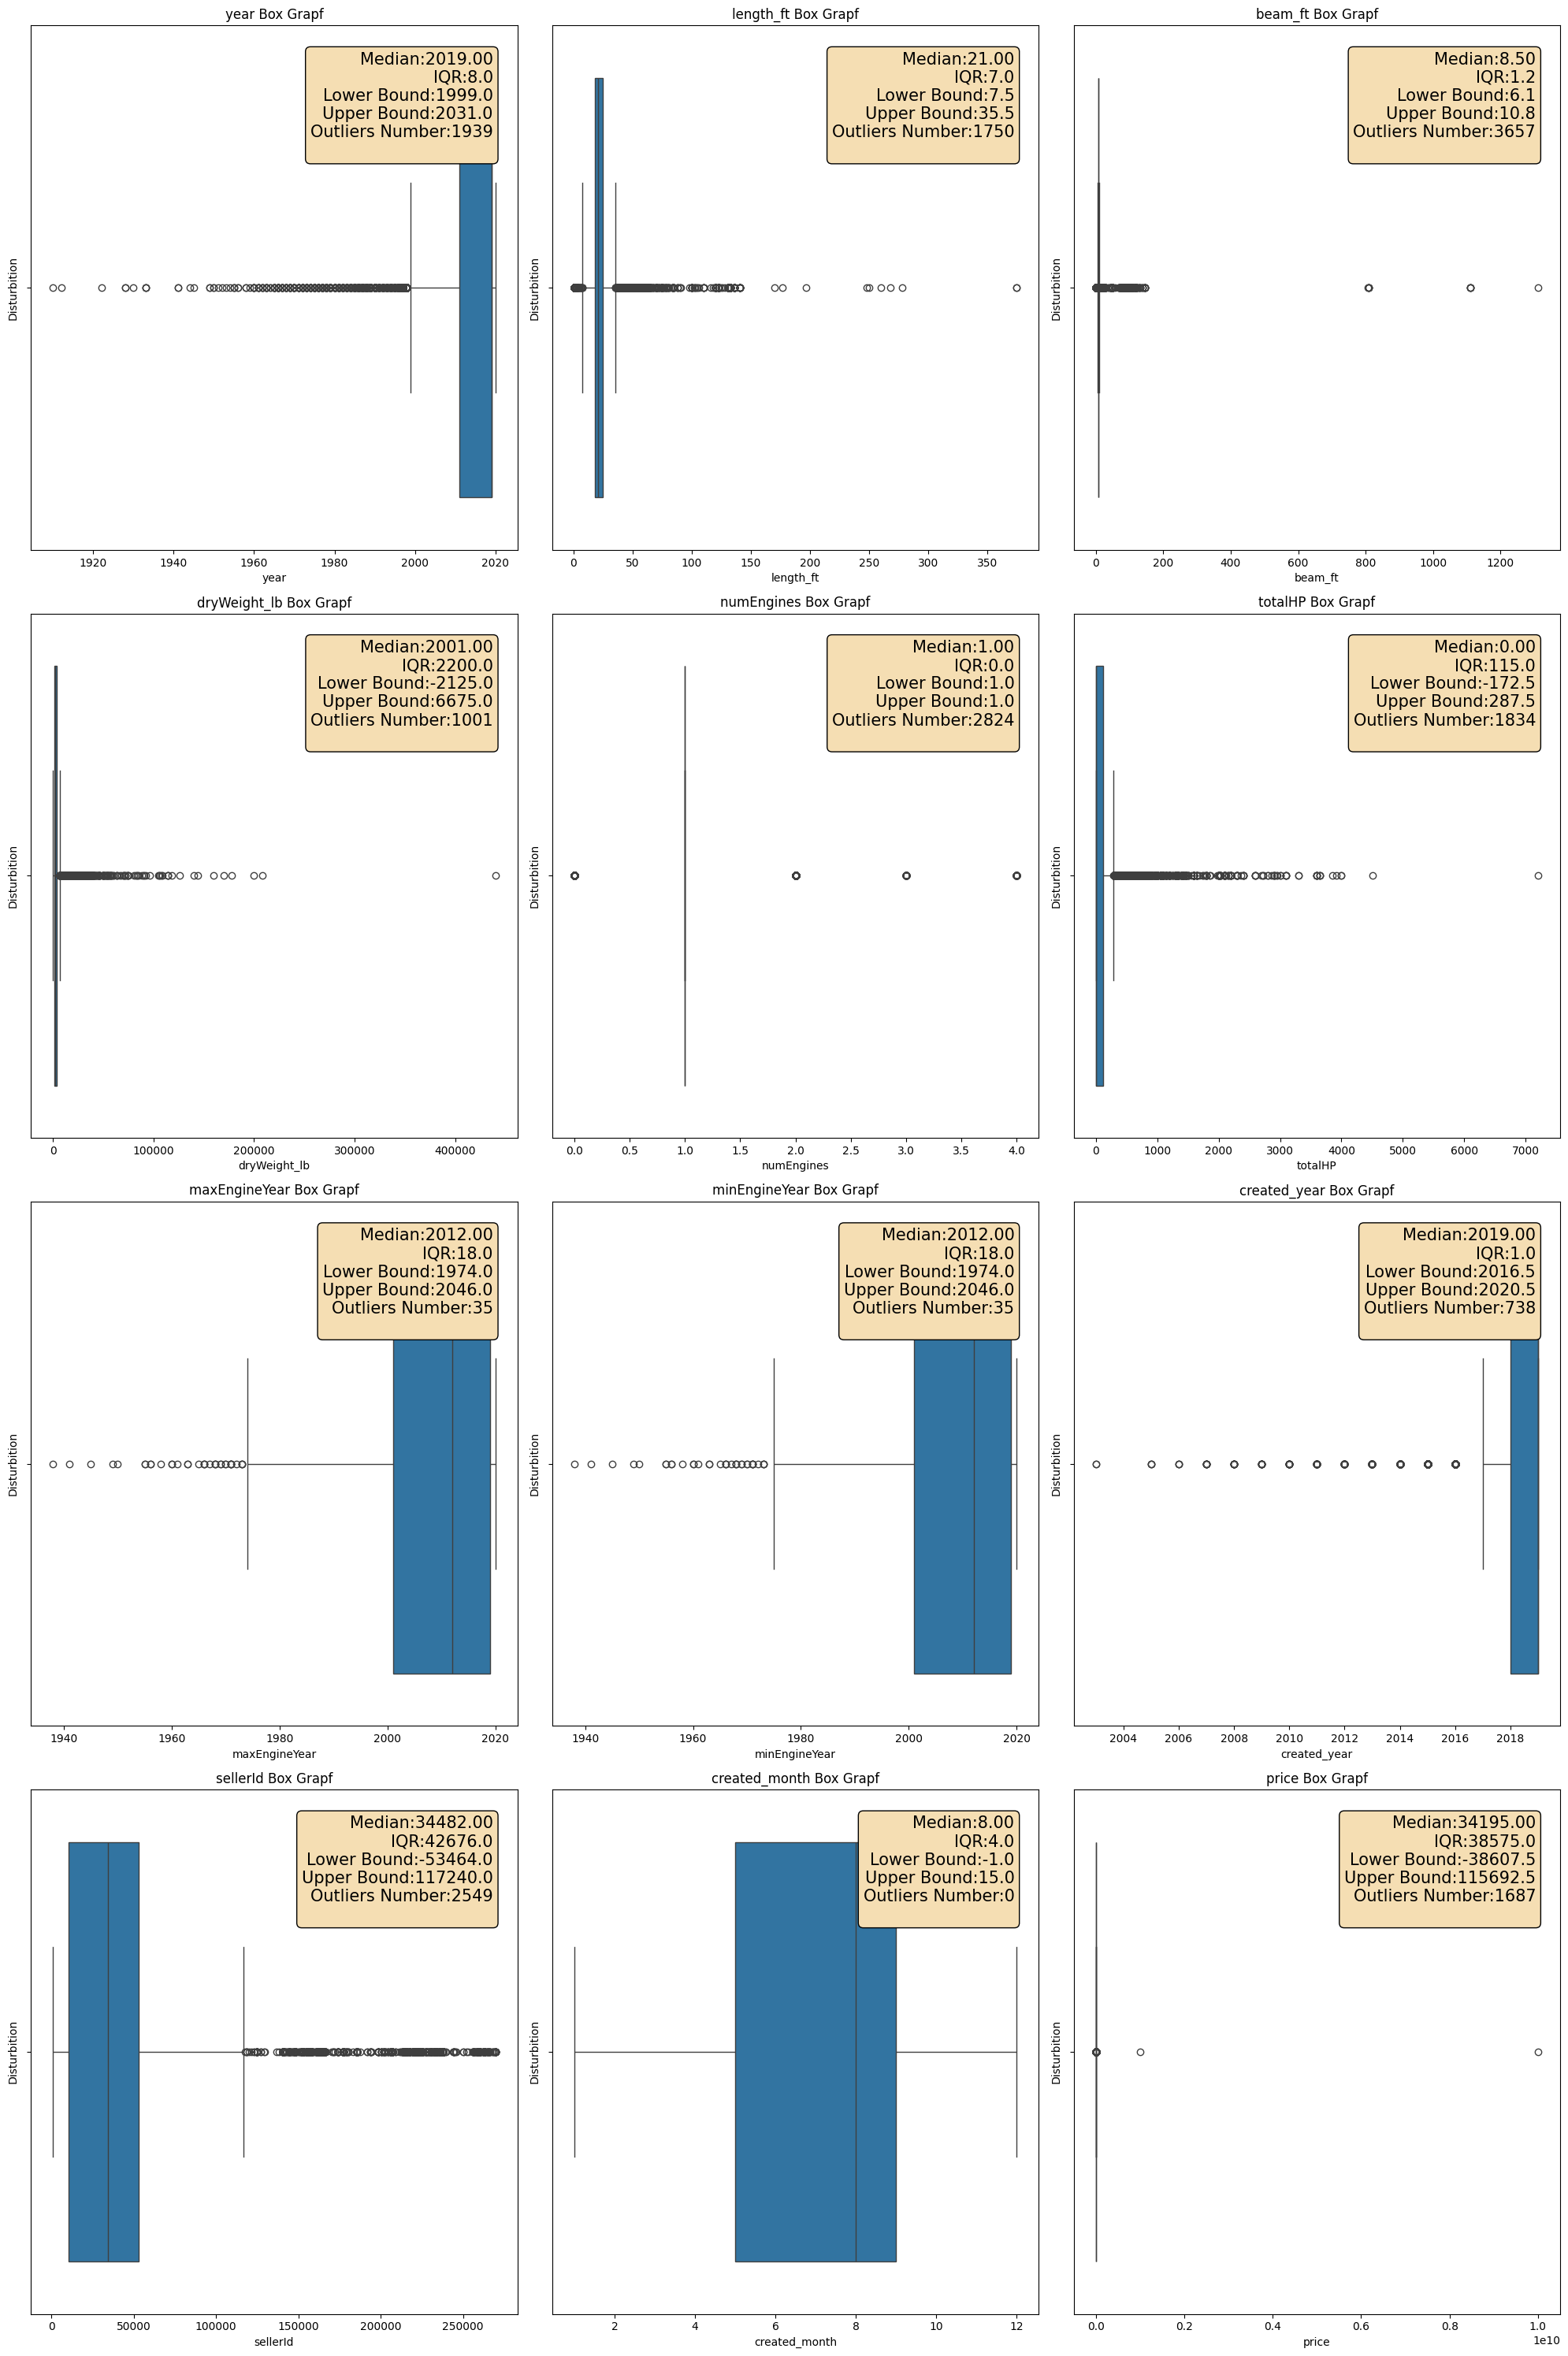

In [14]:
box(df_num,4,3)

##Categorical Data

In [28]:
num_col=['type','boatClass','condition','hullMaterial','fuelType','engineCategory','state']

C:\Users\samet\AppData\Local\Temp\ipykernel_18700\3399924159.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),rotation=90,ha='right')
C:\Users\samet\AppData\Local\Temp\ipykernel_18700\3399924159.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),rotation=90,ha='right')
C:\Users\samet\AppData\Local\Temp\ipykernel_18700\3399924159.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),rotation=90,ha='right')
C:\Users\samet\AppData\Local\Temp\ipykernel_18700\3399924159.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xt

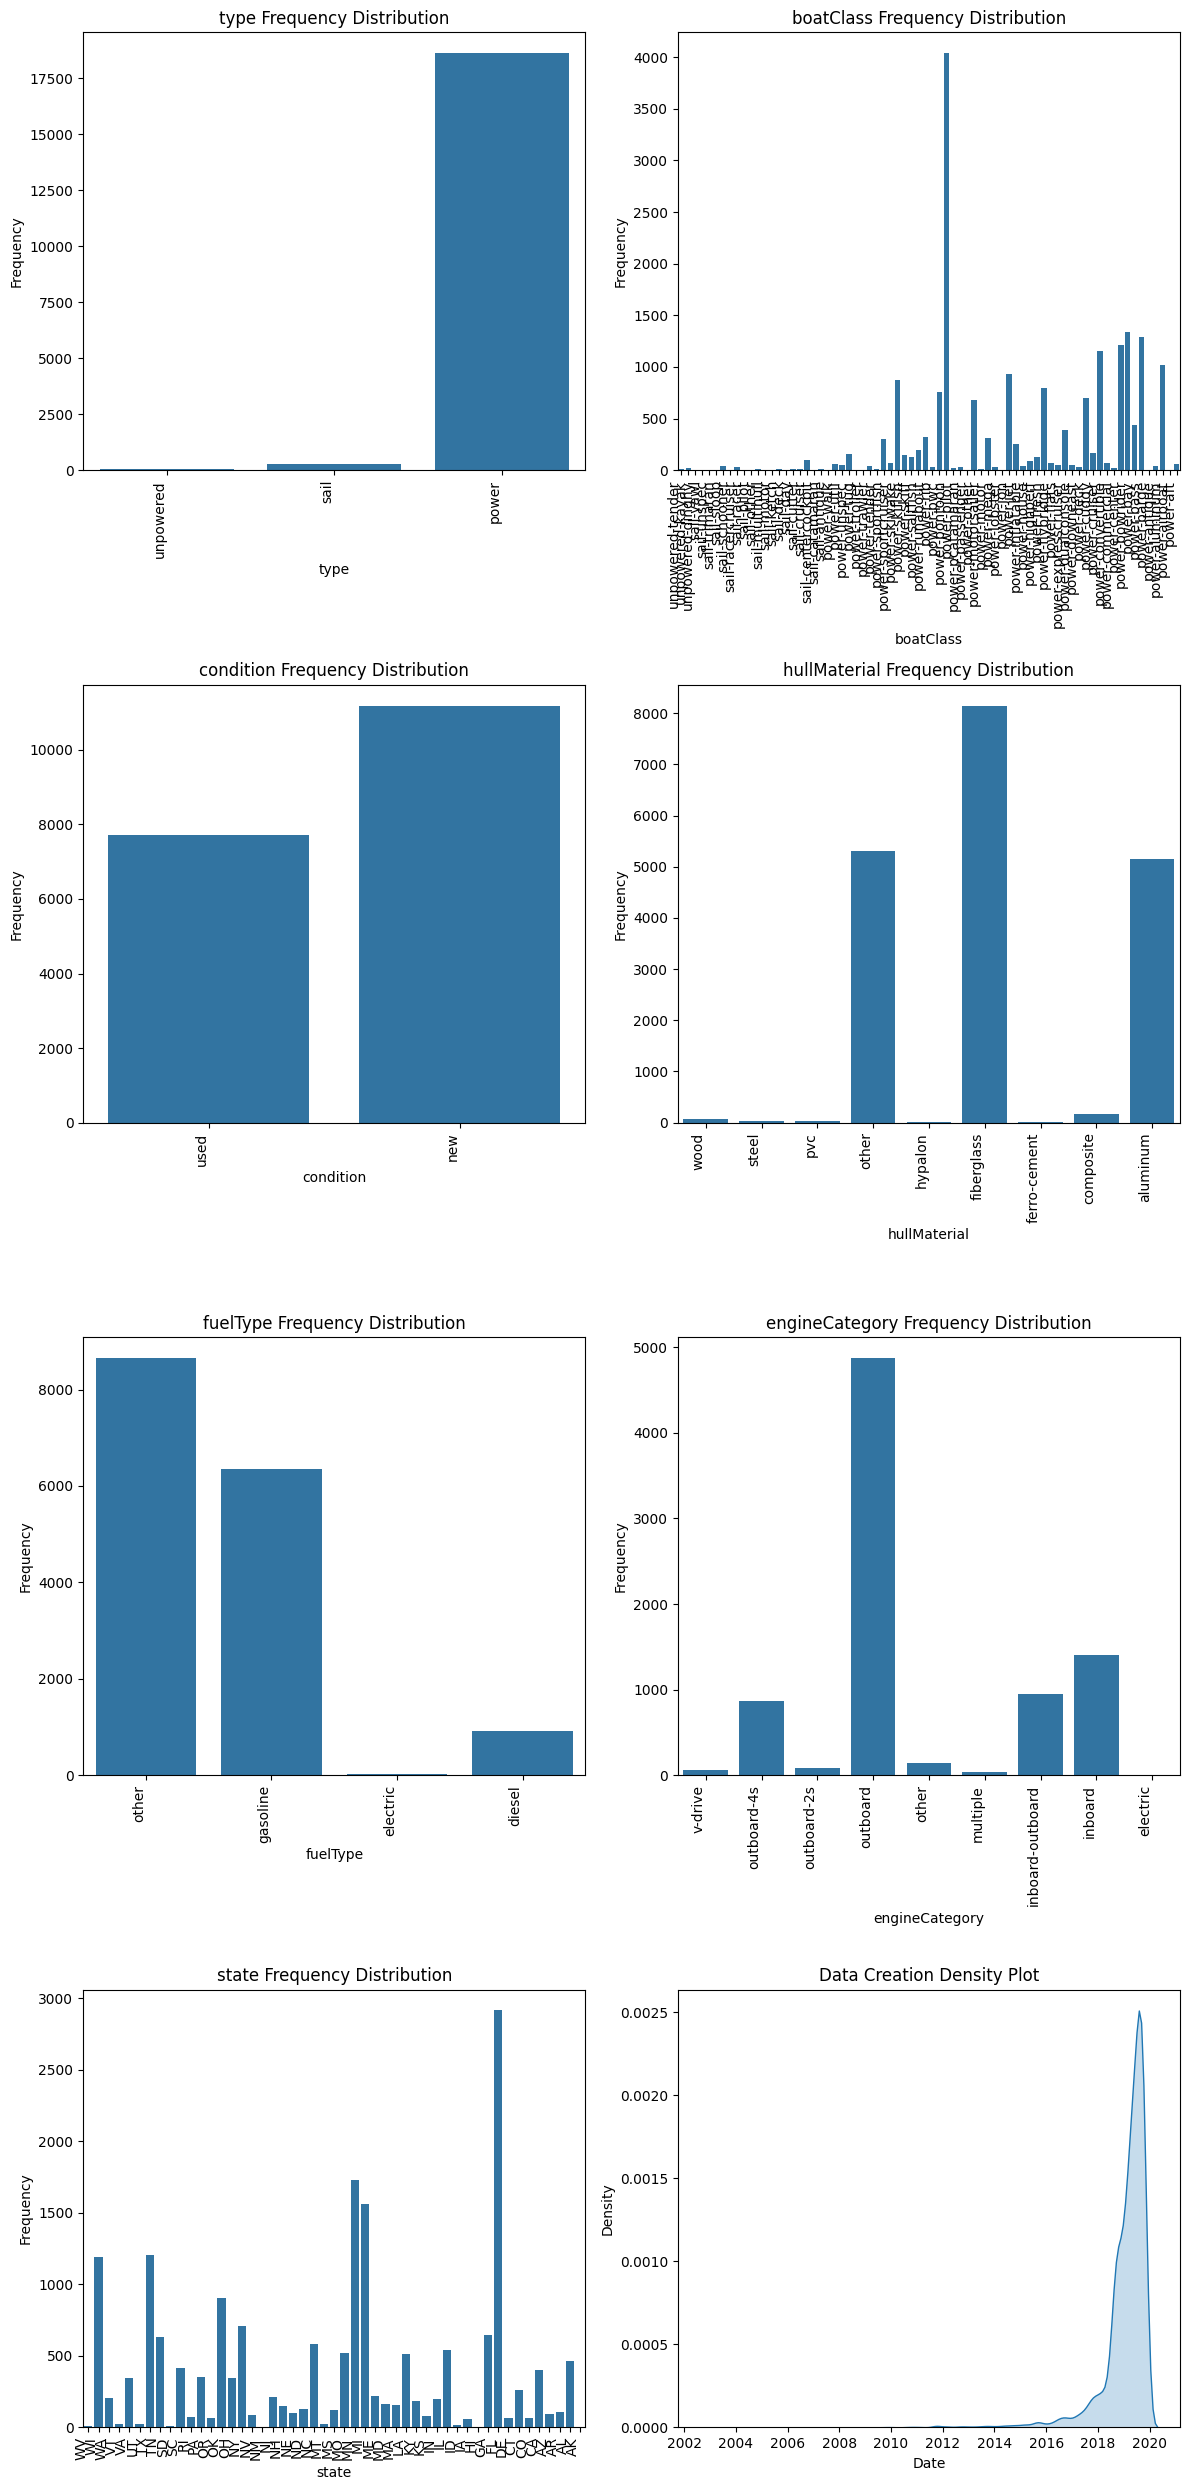

In [63]:
fig,ax=plt.subplots(4,2,figsize=(12,25))
for i,col in enumerate(num_col):
    g=sns.countplot(data=df, x=df[col].sort_values(ascending=False),ax=ax[i//2,i%2])
    g.set_title(f"{col} Frequency Distribution")
    g.set_xlabel(f"{col}")
    g.set_ylabel('Frequency')
    g.set_xticklabels(g.get_xticklabels(),rotation=90,ha='right')

df['created_date'] = pd.to_datetime(df['created_date'])
daily_counts = df.resample('D', on='created_date').size()
daily_counts.plot()

g1=sns.kdeplot(df['created_date'], shade=True,ax=ax[3,1])
g1.set_title('Data Creation Density Plot')
g1.set_xlabel('Date')
g1.set_ylabel('Density')
plt.tight_layout()
plt.show()

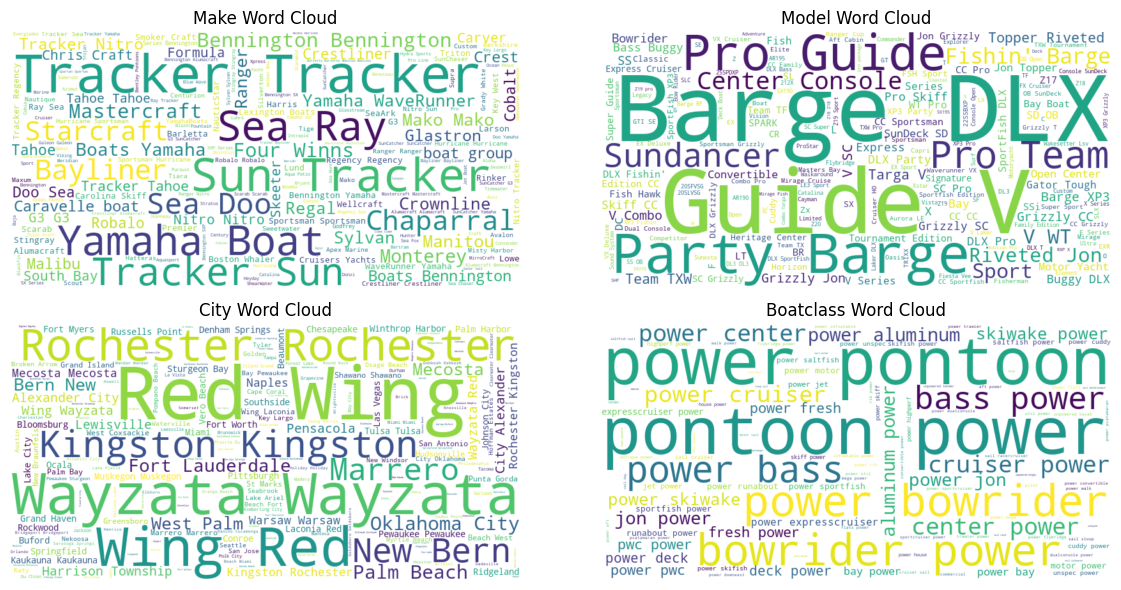

In [101]:
from wordcloud import WordCloud
fig,axes=plt.subplots(2,2,figsize=(12, 6))
for i, col in enumerate(['make','model','city','boatClass']):
    row_index = i // 2
    col_index = i % 2
    ax = axes[row_index, col_index]
    if df[col].dtype == 'O':
        make_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df[col].dropna()))
        ax.imshow(make_wordcloud, interpolation='bilinear')
        ax.set_title(f"{col.capitalize()} Word Cloud")
        ax.axis('off')
   

plt.tight_layout()        
plt.show()


Correlation of Target Variable

In [153]:
for col in df_num.columns:
    df_num.fillna(df_num[col].median(),inplace=True)
df_num.isnull().sum()

year             0
length_ft        0
beam_ft          0
dryWeight_lb     0
numEngines       0
totalHP          0
maxEngineYear    0
minEngineYear    0
created_year     0
sellerId         0
created_month    0
price            0
dtype: int64

In [116]:
df_num.nunique()

year               80
length_ft         599
beam_ft           351
dryWeight_lb     1161
numEngines          5
totalHP           286
maxEngineYear      67
minEngineYear      66
created_year       16
sellerId         1375
created_month      12
price            6074
dtype: int64

In [126]:
df.select_dtypes(include='number').columns[:11]

Index(['year', 'length_ft', 'beam_ft', 'dryWeight_lb', 'numEngines', 'totalHP',
       'maxEngineYear', 'minEngineYear', 'created_year', 'sellerId',
       'created_month'],
      dtype='object')

In [131]:
def corr(df_num,nrow,ncol):
    fig,axes=plt.subplots(nrow,ncol,figsize=(nrow*5,ncol*25))
    line_color='black'
    for i, col in enumerate(df_num.columns[:11]):
        row_index = i // ncol
        col_index = i % ncol
        ax = axes[row_index, col_index]
        g=sns.regplot(x=df_num[col],y='price',data=df_num,ax=ax,line_kws={'color': line_color})
        g.set(title=(f"{col.capitalize()} vs Price Corr"),xlabel=(f"{col}"),ylabel=('Price'))
        corr, p_value = stats.pearsonr(df_num[col],df_num['price'])
        text_str=(f"Pearson correlation coefficient:{corr}\n"
                  f"P_vale:{p_value}\n")
        g.text(0.95, 0.95, text_str, transform=g.transAxes,
                fontsize=20, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat'))
    plt.tight_layout()
    plt.show()
        
        
        

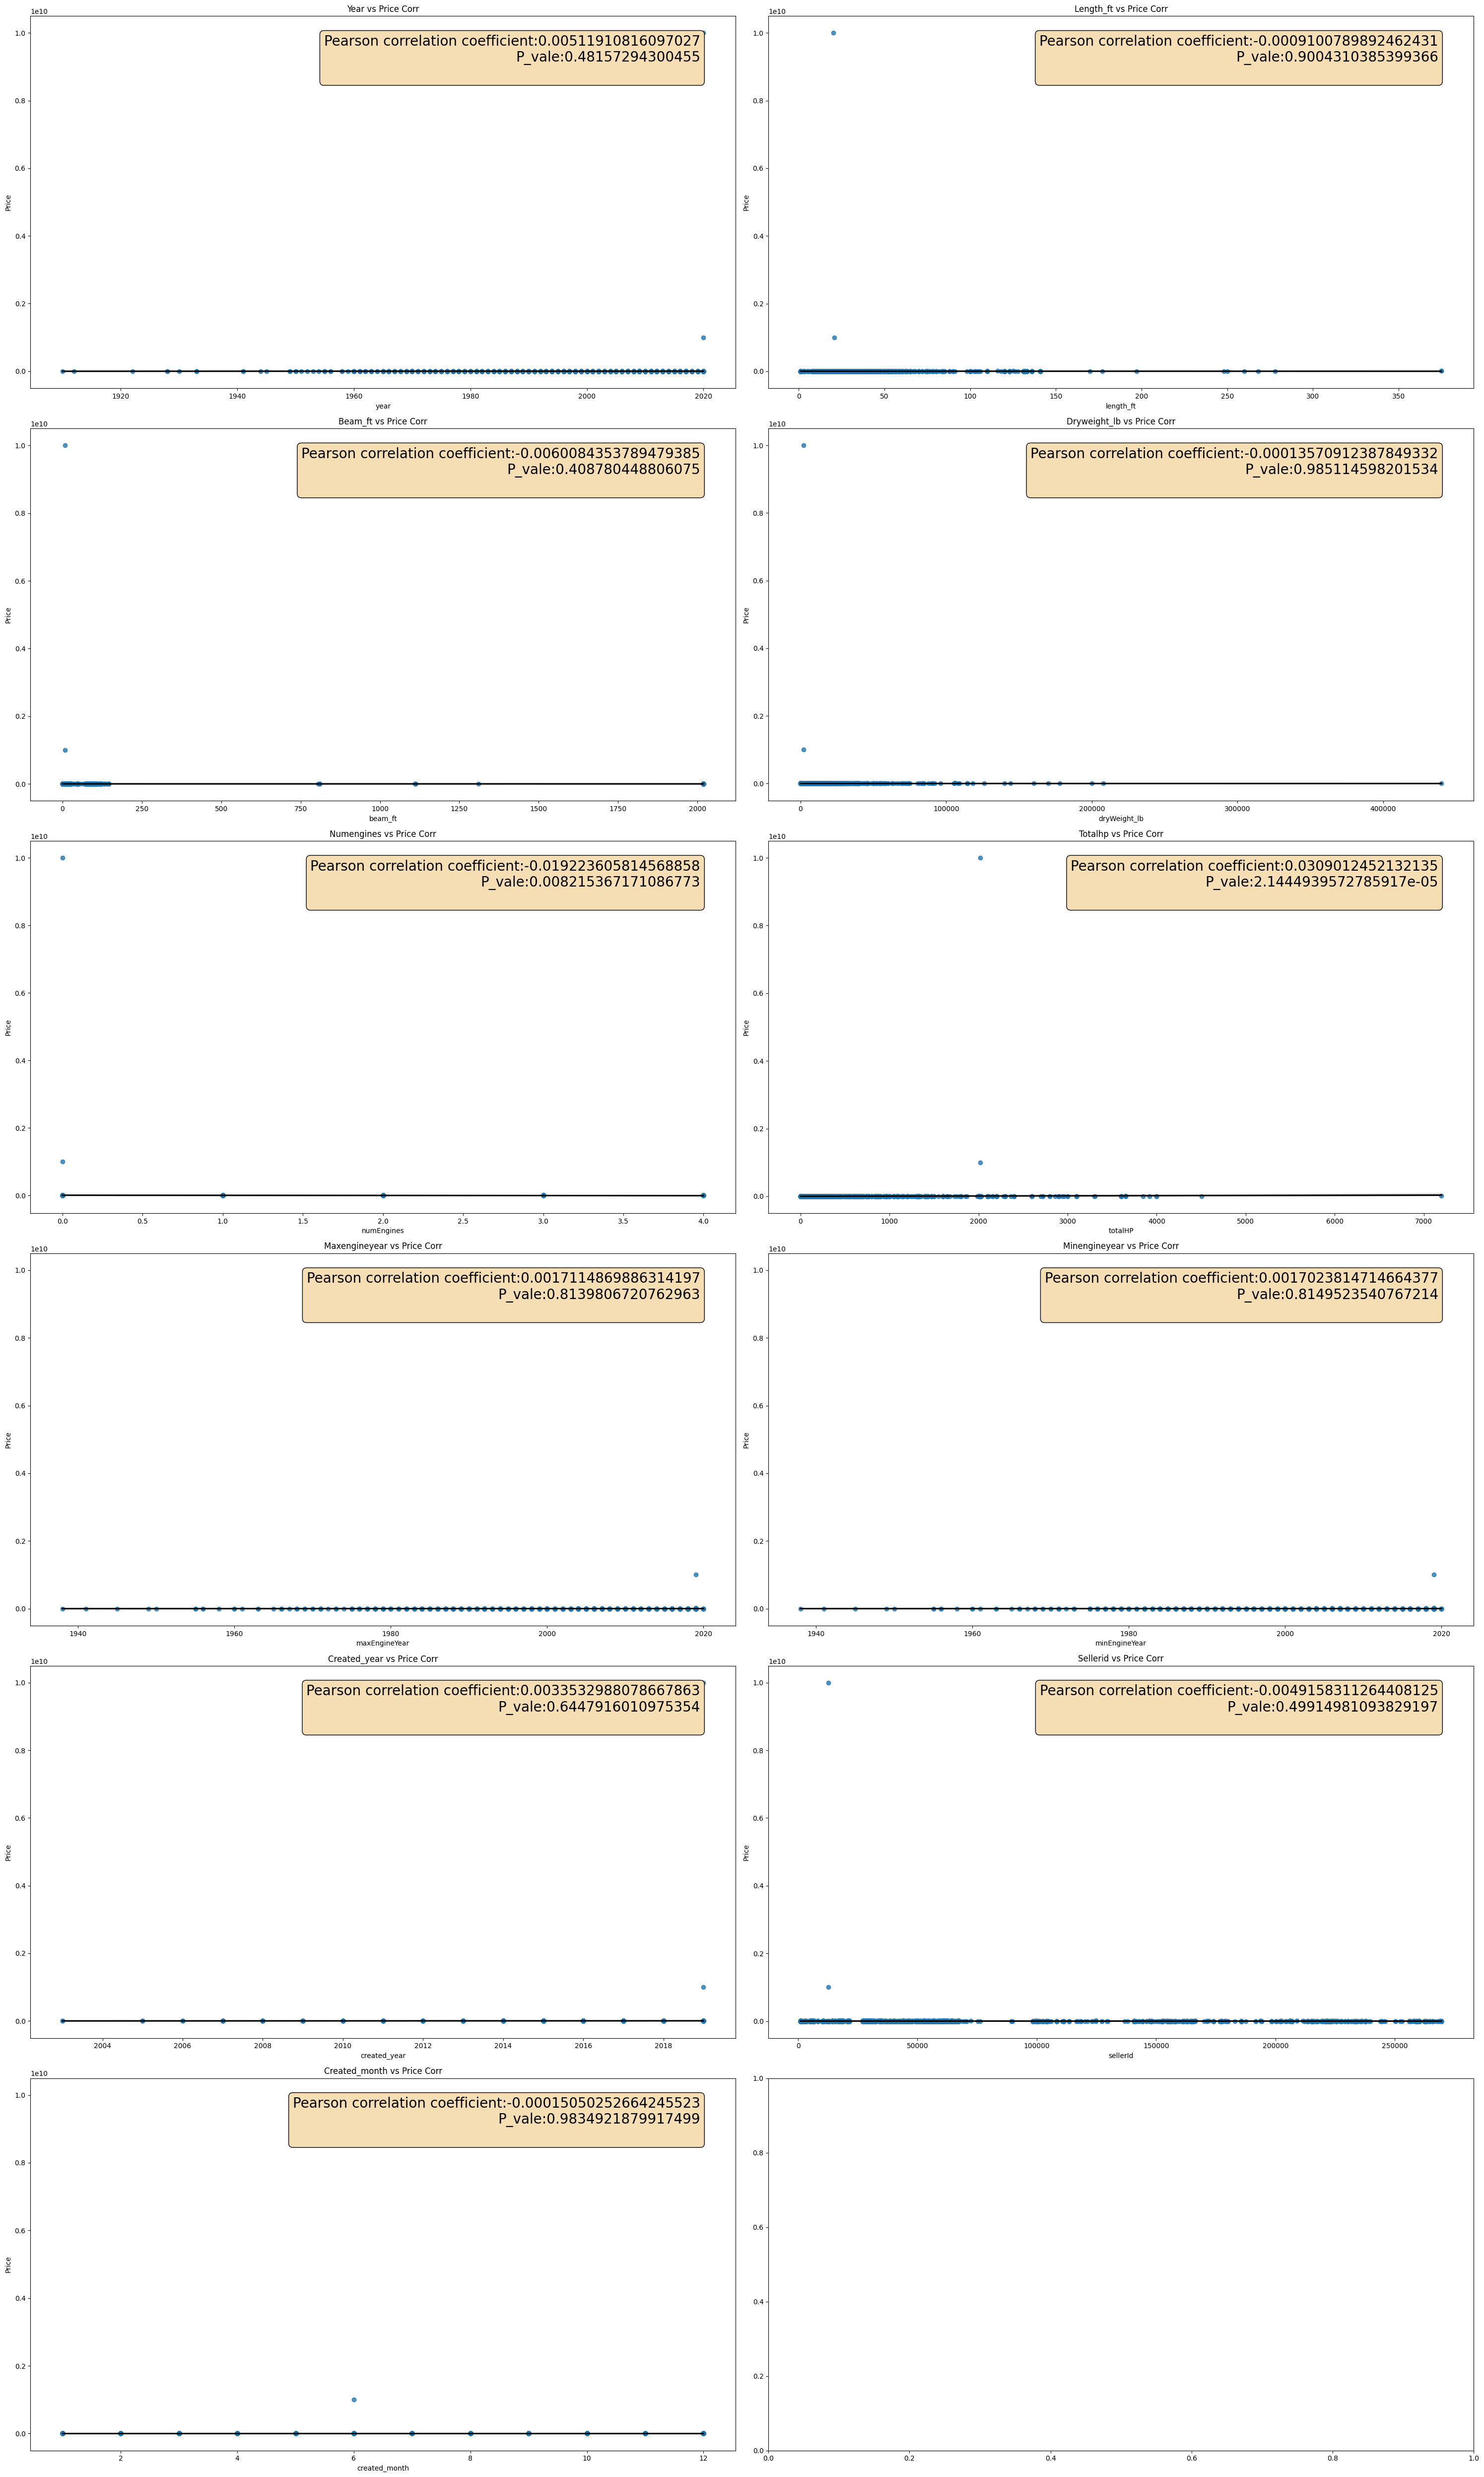

In [132]:
corr(df_num,6,2)

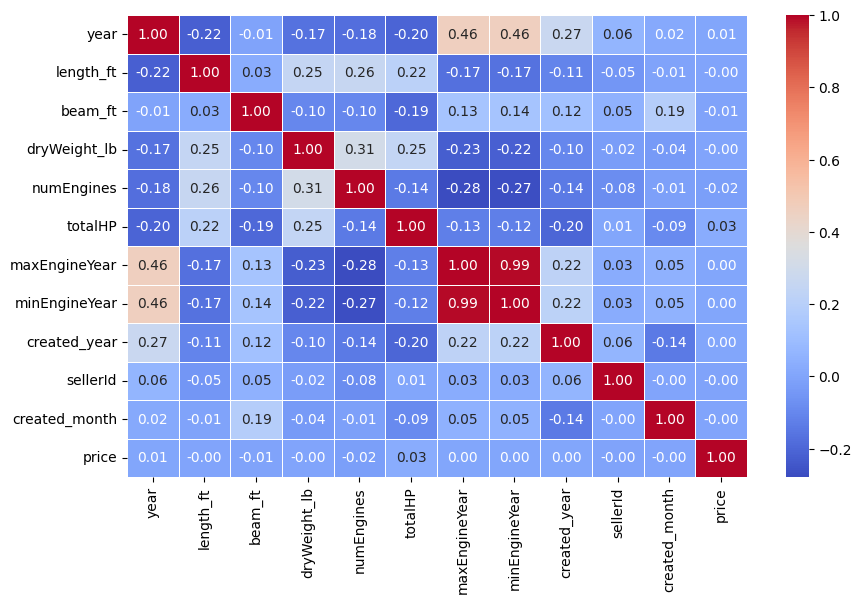

In [123]:
plt.figure(figsize=(10,6))
sns.heatmap(df_num.corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

Corr Categorical of Target Variables

In [154]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
lb = LabelEncoder()

for col in ['type', 'condition', 'hullMaterial', 'fuelType', 'engineCategory']:
    df_cat[col] = lb.fit_transform(df_cat[col])

df_cat

type             boatClass         make                      model  \
0         0          power-center    Aquasport                     210 CC   
1         0    power-sportcruiser      Formula            400 Super Sport   
2         0            power-deck     Bayliner                Element 180   
3         0  power-expresscruiser        Regal                 32 Express   
4         0             power-aft       Carver  440 Aft Cabin Motor Yacht   
...     ...                   ...          ...                        ...   
18898     0         power-pontoon  Silver Wave                   250 Play   
18899     0        power-runabout       Rinker            Captiva 200 MTX   
18900     0             power-bay       Blazer                       2200   
18901     0         power-pontoon        Aloha                        250   
18902     0         power-cruiser     Bayliner                 2655 Ciera   

       condition  hullMaterial  fuelType  engineCategory              city  \
0              1             3         2               7         Englewood   
1              1             3         0               2    Harsens Island   
2              0             3         2               7          Marietta   
3              1             3         2               3  North Charleston   
4              1             3         0               1      Middle River   
...          ...           ...       ...             ...               ...   
18898          1             0         2               9           Acworth   
18899          1             3         2               9     New Baltimore   
18900          0             3         2               9          Seabrook   
18901          1             0         2               9     Sunrise Beach   
18902          0             3         2               2       Gainesville   

      state    zip created_date  
0        FL  34224   2019-10-16  
1        MI  48028   2019-09-24  
2        OH  45750   2019-11-02  
3        SC  29405   2019-09-19  
4        MD  21220   2018-08-29  
...     ...    ...          ...  
18898    GA  30102   2019-06-25  
18899    MI  48047   2019-06-12  
18900    TX  77586   2018-12-12  
18901    MO  65079   2019-05-10  
18902    GA  30501   2019-07-08  

[18903 rows x 12 columns]

In [168]:
df_cat.isnull().sum()

type                 0
boatClass            0
make                 0
model               35
condition            0
hullMaterial         0
fuelType             0
engineCategory       0
city                56
state                0
zip               8688
created_date         0
dtype: int64

In [136]:
num_col

['type',
 'boatClass',
 'condition',
 'hullMaterial',
 'fuelType',
 'engineCategory',
 'state']

In [157]:
df['created_date'] = pd.to_datetime(df['created_date'])

In [173]:
from scipy.stats import f_oneway
def cat_corr(df_cat,nrow,ncol):
    fig,axes=plt.subplots(nrow,ncol,figsize=(nrow*5,ncol*10))
    
    for i, col in enumerate(['type','condition','hullMaterial','fuelType','engineCategory','created_date']):
        row_index = i // ncol
        col_index = i % ncol
        ax = axes[row_index, col_index]
        if col !='created_date':
            g=sns.barplot(x=df[col],y='price',data=df,ax=ax,hue=df[col])
            g.set(title=(f"{col.capitalize()} vs Price Corr"),xlabel=(f"{col}"),ylabel=('Price'))
            grouped_data = [df['price'][df_cat[col] == category] for category in df_cat[col].unique()]
            f_statistic, p_value = f_oneway(*grouped_data)
            text_str1=(f"f_statistic:{f_statistic}\n"
               f"P_value:{p_value}")
            g.text(0.95, 0.95, text_str1, transform=g.transAxes,
                 fontsize=10, verticalalignment='top', horizontalalignment='right',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        else:
            g1=sns.lineplot(x=df_cat[col],y='price',data=df,ax=ax)
            g1.set(title=(f"{col.capitalize()} vs Price Corr"),xlabel=(f"{col}"),ylabel=('Price'))
            grouped_data = [df['price'][df_cat[col] == category] for category in df_cat[col].unique()]
            f_statistic, p_value = f_oneway(*grouped_data)
            text_str1=(f"f_statistic:{f_statistic}\n"
               f"P_value:{p_value}")
            g1.text(0.95, 0.95, text_str1, transform=g1.transAxes,
                 fontsize=10, verticalalignment='top', horizontalalignment='right',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
        
        
    

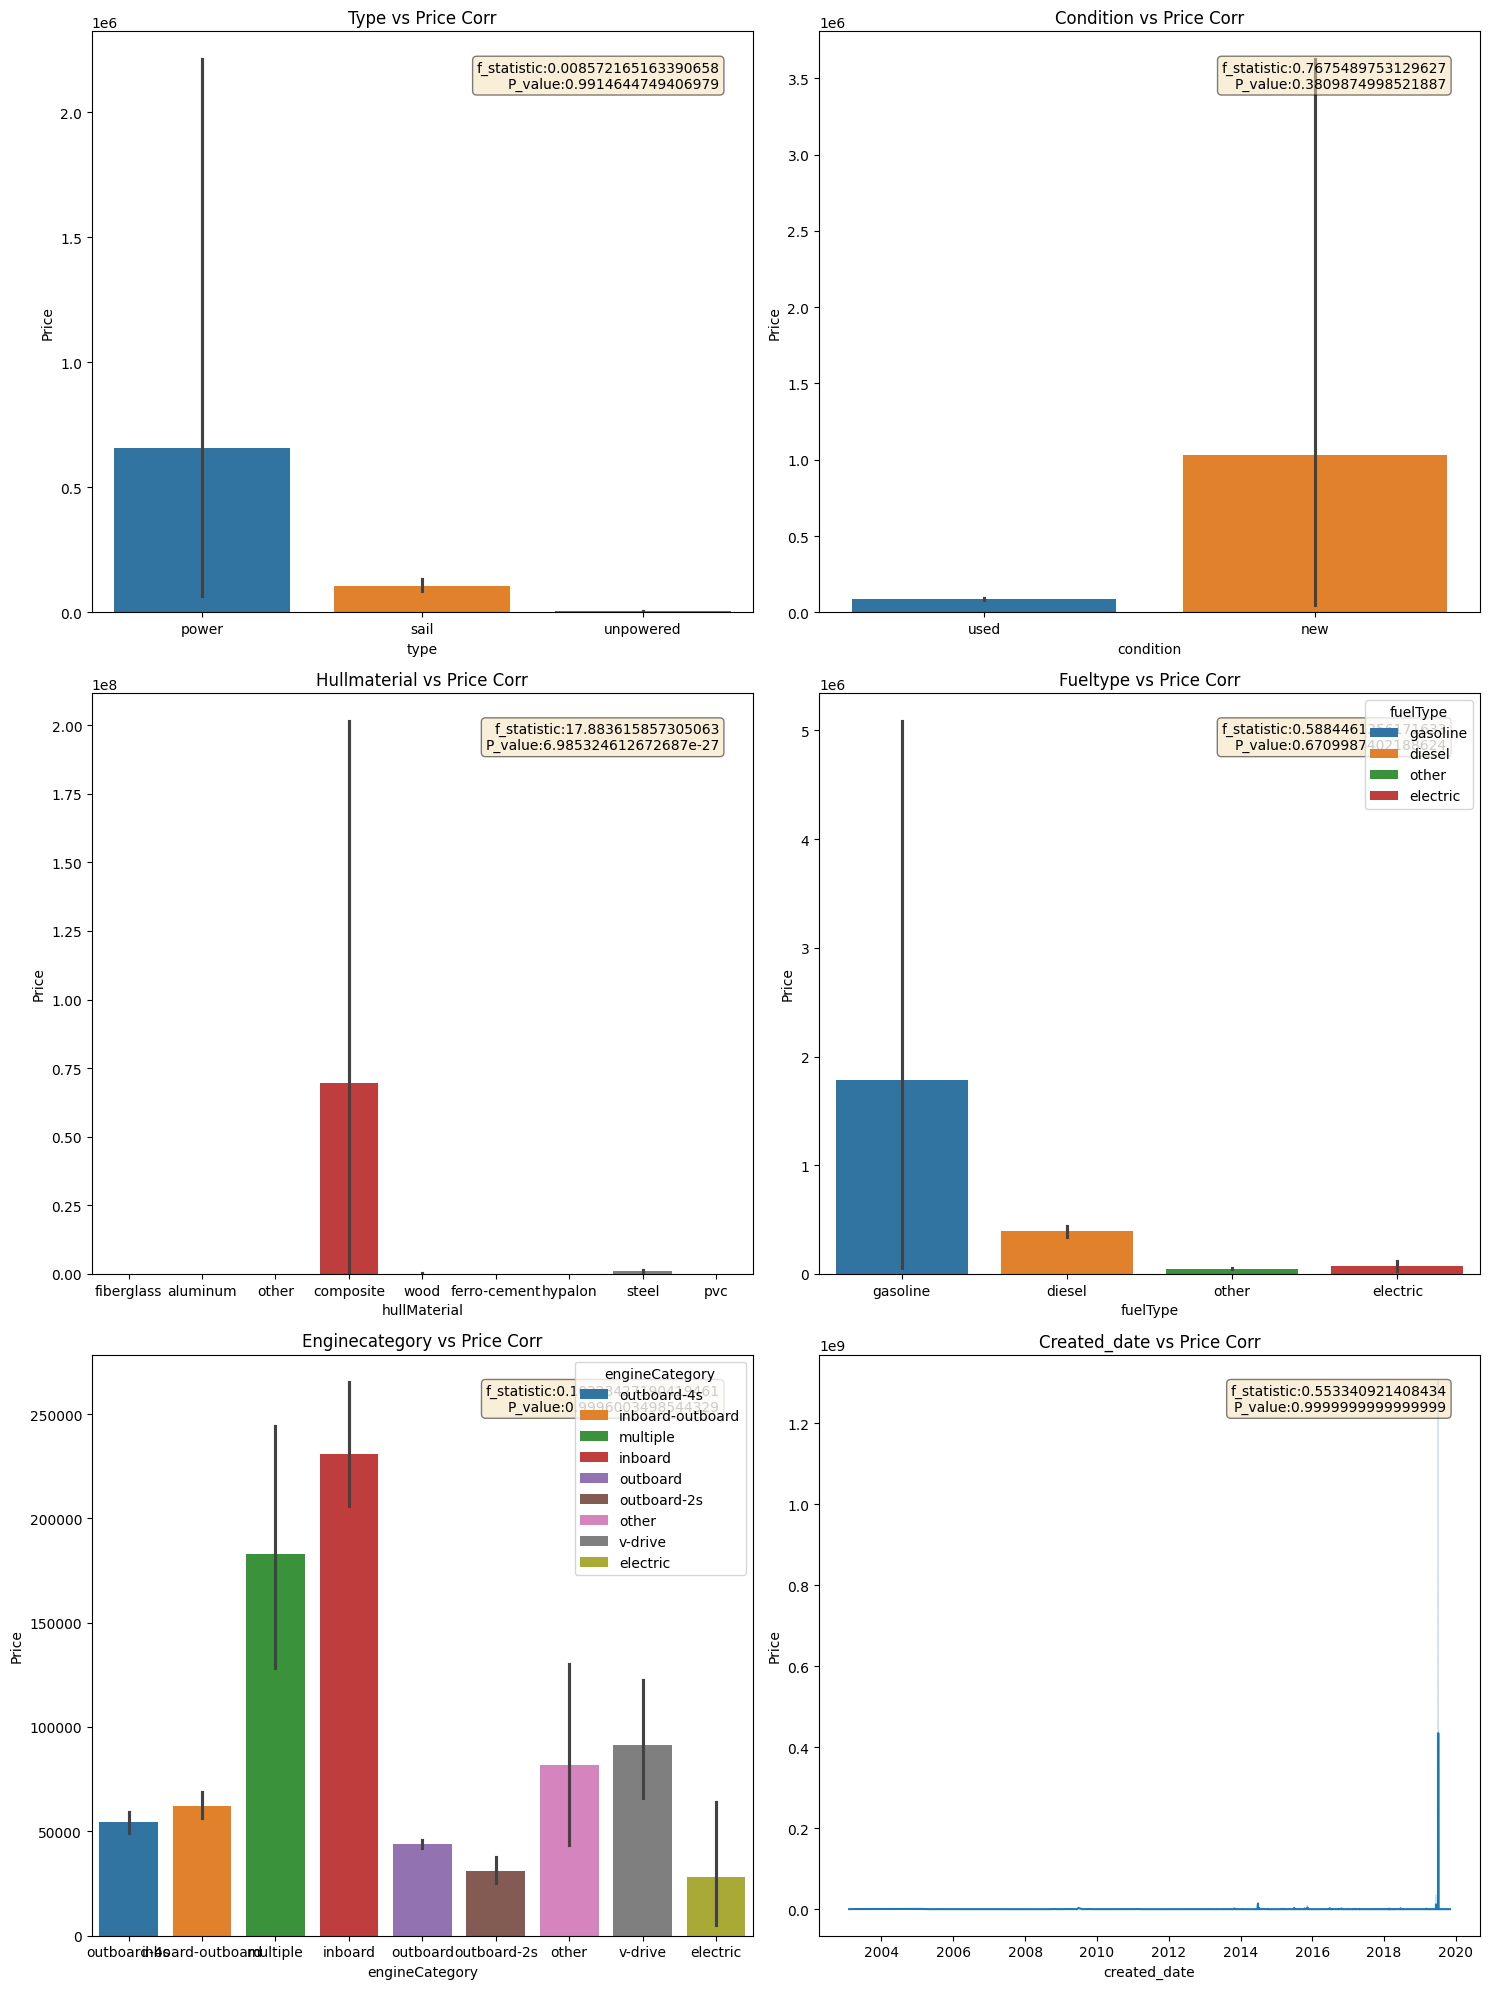

In [174]:
cat_corr(df_cat,3,2)

In [227]:
df.nunique()

type                 3
boatClass           72
make               960
model             7899
year                80
condition            2
length_ft          599
beam_ft           2077
dryWeight_lb      5149
hullMaterial         9
fuelType             4
numEngines           5
totalHP            481
maxEngineYear      210
minEngineYear      209
engineCategory       9
created_year        16
sellerId          1375
city              1149
state               49
zip               1046
created_date      1424
created_month       12
price             6074
dtype: int64

Nan Values Fill ,Label Encoder and Scalerr


In [258]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler

In [226]:
class CategoricalEncoder:
    def __init__(self):
        self.one_hot_encoders = {}
        self.label_encoders = {}
        self.frequency_map = {}

    def one_hot_encode(self, data, columns):
        encoded_data = data.copy()
        for col in columns:
            unique_values = data[col].unique()
            if len(unique_values) == 2:
                # Two unique values, apply One-Hot Encoding
                one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
                encoded_col = one_hot_encoder.fit_transform(encoded_data[[col]])
                encoded_col = pd.DataFrame(encoded_col, columns=[col + '_' + str(int(i)) for i in range(encoded_col.shape[1])])
                encoded_data = pd.concat([encoded_data, encoded_col], axis=1)
                self.one_hot_encoders[col] = one_hot_encoder
            else:
                # More than two unique values, skip One-Hot Encoding
                if len(unique_values) > 10:
                    # If more than 10 unique values, encode using frequency distribution
                    self.frequency_map[col] = data[col].value_counts().to_dict()
                    encoded_data[col] = data[col].map(self.frequency_map[col])
                else:
                    self.label_encoders[col] = LabelEncoder()
                    encoded_data[col] = self.label_encoders[col].fit_transform(encoded_data[col])
        return encoded_data


In [230]:
encoder = CategoricalEncoder()
encoded_df = encoder.one_hot_encode(df, df.columns)

encoded_df

c:\Users\samet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


type  boatClass  make  model  year condition  length_ft  beam_ft  \
0         0          8    34   1413    51      used        241      691   
1         0         41   324   3874    77      used        503     1034   
2         0         13    70   5258    79       new        158      415   
3         0         16   698   3394    74      used        447      985   
4         0          0   166   3998    53      used        515     1241   
...     ...        ...   ...    ...   ...       ...        ...      ...   
18898     0         33   783   2654    72      used        351      691   
18899     0         36   709   4860    72      used        196      548   
18900     0          6   103   1783    78       new        267      467   
18901     0         33    17   2625    63      used        351      691   
18902     0         11    70   2918    61       new        392      876   

       dryWeight_lb  hullMaterial  ...  engineCategory  created_year  \
0              2401             3  ...               7            15   
1              4531             3  ...               2            15   
2              1466             3  ...               7            15   
3              4364             3  ...               3            15   
4              4944             3  ...               1            14   
...             ...           ...  ...             ...           ...   
18898          1634             0  ...               9            15   
18899          2192             3  ...               9            15   
18900          2877             3  ...               9            14   
18901          1022             0  ...               9            15   
18902          3738             3  ...               2            15   

       sellerId  city  state  zip  created_date  created_month  price  \
0          1263   281      8  554          1406              9    837   
1           835   407     21  703          1384              8   5911   
2          1270   609     34  686          1423             10   1703   
3           662   716     39  321          1379              8   5559   
4           395   641     19  223          1006              7   5243   
...         ...   ...    ...  ...           ...            ...    ...   
18898       624     2      9  344          1293              5   2209   
18899       245   688     21  705          1281              5   1703   
18900      1076   949     42  940          1107             11   3032   
18901       112  1032     23  838          1248              4    862   
18902      1154   338      9  349          1306              6    929   

       condition_0  
0              1.0  
1              1.0  
2              0.0  
3              1.0  
4              1.0  
...            ...  
18898          1.0  
18899          1.0  
18900          0.0  
18901          1.0  
18902          0.0  

[18903 rows x 25 columns]

In [232]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error,r2_score

In [286]:
class NumericImputation:
    def __init__(self):
        pass
    def fill_missing_values(self,data,method_n='mean'):
        df_new=data.copy()
        numerical_cols_with_missing = df_new.select_dtypes(include=['number']).columns[df_new.select_dtypes(include=['number']).isnull().any()].tolist()
        categorical_cols=numerical_cols_with_missing = df_new.select_dtypes(include=['object']).columns[df_new.select_dtypes(include=['object']).isnull().any()].tolist()
        
        for col in numerical_cols_with_missing:
            if method_n=='mean':
                df_new[col].fillna(df_new[col].mean(),inplace=True)
            elif method_n=='median':
                df_new[col].fillna(df_new[col].median(),inplace=True)
            elif method_n == 'linear_interpolation':
                df_new[col].interpolate(method='linear', inplace=True)
            elif method_n == 'knn':
                imputer = KNNImputer(n_neighbors=5)
                df_new[col] = imputer.fit_transform(df_new[[col]])
            else:
                raise ValueError("Invalid imputation method! Choose from 'mean', 'median', 'linear_interpolation', 'knn'")
        return df_new
    def train_and_evaluate(self,model, x_tr, y_tr, x_ts, y_ts):
        # Modeli eğit ve R2 skorunu hesapla
        
        model.fit(x_tr, y_tr)
        y_pr = model.predict(x_ts)
        r2 = r2_score(y_ts, y_pr)
        mae=np.sqrt(mean_squared_error(y_ts,y_pr))
        
        return r2,mae
        
        
    

In [289]:
class MultiColumnScaler:

    def __init__(self, columns=None):
        self.columns = columns 


    def fit(self, X, y=None):
        self.encoders = {}
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            self.encoders[col] = StandardScaler().fit(X[col].to_numpy().reshape(-1,1))
        return self


    def transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].transform(X[col].to_numpy().reshape(-1,1))
        return output


    def fit_transform(self, X, y=None):
        return self.fit(X,y).transform(X)


    def inverse_transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].inverse_transform(X[col].to_numpy().reshape(-1,1))
        return output

In [260]:
dfv=encoded_df.copy()

In [264]:
dfv=dfv.drop(['condition','sellerId'],axis=1)
dfv

type  boatClass  make  model  year  length_ft  beam_ft  dryWeight_lb  \
0         0          8    34   1413    51        241      691          2401   
1         0         41   324   3874    77        503     1034          4531   
2         0         13    70   5258    79        158      415          1466   
3         0         16   698   3394    74        447      985          4364   
4         0          0   166   3998    53        515     1241          4944   
...     ...        ...   ...    ...   ...        ...      ...           ...   
18898     0         33   783   2654    72        351      691          1634   
18899     0         36   709   4860    72        196      548          2192   
18900     0          6   103   1783    78        267      467          2877   
18901     0         33    17   2625    63        351      691          1022   
18902     0         11    70   2918    61        392      876          3738   

       hullMaterial  fuelType  ...  minEngineYear  engineCategory  \
0                 3         2  ...            160               7   
1                 3         0  ...            200               2   
2                 3         2  ...            205               7   
3                 3         2  ...            159               3   
4                 3         0  ...             80               1   
...             ...       ...  ...            ...             ...   
18898             0         2  ...            190               9   
18899             3         2  ...             88               9   
18900             3         2  ...            137               9   
18901             0         2  ...            146               9   
18902             3         2  ...            120               2   

       created_year  city  state  zip  created_date  created_month  price  \
0                15   281      8  554          1406              9    837   
1                15   407     21  703          1384              8   5911   
2                15   609     34  686          1423             10   1703   
3                15   716     39  321          1379              8   5559   
4                14   641     19  223          1006              7   5243   
...             ...   ...    ...  ...           ...            ...    ...   
18898            15     2      9  344          1293              5   2209   
18899            15   688     21  705          1281              5   1703   
18900            14   949     42  940          1107             11   3032   
18901            15  1032     23  838          1248              4    862   
18902            15   338      9  349          1306              6    929   

       condition_0  
0              1.0  
1              1.0  
2              0.0  
3              1.0  
4              1.0  
...            ...  
18898          1.0  
18899          1.0  
18900          0.0  
18901          1.0  
18902          0.0  

[18903 rows x 23 columns]

Linear Regression ML 

In [308]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet,SGDRegressor,PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV


In [267]:
x=dfv.drop(['price'],axis=1)
y=dfv['price']
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.25,random_state=42)

In [291]:
sc=MultiColumnScaler(columns=['price'])
dfv1=sc.fit_transform(dfv)
dfv1

type  boatClass  make  model  year  length_ft  beam_ft  dryWeight_lb  \
0         0          8    34   1413    51        241      691          2401   
1         0         41   324   3874    77        503     1034          4531   
2         0         13    70   5258    79        158      415          1466   
3         0         16   698   3394    74        447      985          4364   
4         0          0   166   3998    53        515     1241          4944   
...     ...        ...   ...    ...   ...        ...      ...           ...   
18898     0         33   783   2654    72        351      691          1634   
18899     0         36   709   4860    72        196      548          2192   
18900     0          6   103   1783    78        267      467          2877   
18901     0         33    17   2625    63        351      691          1022   
18902     0         11    70   2918    61        392      876          3738   

       hullMaterial  fuelType  ...  minEngineYear  engineCategory  \
0                 3         2  ...            160               7   
1                 3         0  ...            200               2   
2                 3         2  ...            205               7   
3                 3         2  ...            159               3   
4                 3         0  ...             80               1   
...             ...       ...  ...            ...             ...   
18898             0         2  ...            190               9   
18899             3         2  ...             88               9   
18900             3         2  ...            137               9   
18901             0         2  ...            146               9   
18902             3         2  ...            120               2   

       created_year  city  state  zip  created_date  created_month     price  \
0                15   281      8  554          1406              9 -1.026478   
1                15   407     21  703          1384              8  1.873977   
2                15   609     34  686          1423             10 -0.531446   
3                15   716     39  321          1379              8  1.672763   
4                14   641     19  223          1006              7  1.492128   
...             ...   ...    ...  ...           ...            ...       ...   
18898            15     2      9  344          1293              5 -0.242200   
18899            15   688     21  705          1281              5 -0.531446   
18900            14   949     42  940          1107             11  0.228252   
18901            15  1032     23  838          1248              4 -1.012187   
18902            15   338      9  349          1306              6 -0.973888   

       condition_0  
0              1.0  
1              1.0  
2              0.0  
3              1.0  
4              1.0  
...            ...  
18898          1.0  
18899          1.0  
18900          0.0  
18901          1.0  
18902          0.0  

[18903 rows x 23 columns]

In [298]:
imputer = NumericImputation()
models = [
          ('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('HistgBM',HistGradientBoostingRegressor()),
          ('GBM',GradientBoostingRegressor()),
          ('RF', RandomForestRegressor()),
          ("XGBoost",XGBRegressor()),
          ("XGBoostRF", XGBRFRegressor()),
          ("LightGBM", LGBMRegressor(verbose=-1)),
          ("SGDR",SGDRegressor()),
          ("PasRg",PassiveAggressiveRegressor())]
results = []

# Her bir doldurma yöntemiyle doldurulmuş veri kümeleri üzerinde modelleme yap
for method_n in ['mean', 'median', 'knn', 'linear_interpolation']:
    df_filled = imputer.fill_missing_values(dfv1, method_n=method_n)
    x=df_filled.drop(['price'],axis=1)
    y=df_filled['price']
    x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.25,random_state=42)
    for name, model in models:
        r2 , mae= imputer.train_and_evaluate(model, x_tr, y_tr, x_ts, y_ts)
        results.append({'method_n': method_n, 'model': name, 'r2': r2,'Mae':mae})
results_df = pd.DataFrame(results)
results_df
    

method_n       model            r2           Mae
0                   mean          LR  7.620163e-01  4.844898e-01
1                   mean       Ridge  7.620166e-01  4.844895e-01
2                   mean       Lasso  7.411044e-01  5.053280e-01
3                   mean  ElasticNet  7.510242e-01  4.955524e-01
4                   mean         KNN  7.616939e-01  4.848179e-01
5                   mean        CART  8.501575e-01  3.844400e-01
6                   mean     HistgBM  9.264449e-01  2.693502e-01
7                   mean         GBM  8.923781e-01  3.258077e-01
8                   mean          RF  9.258028e-01  2.705233e-01
9                   mean     XGBoost  9.344237e-01  2.543224e-01
10                  mean   XGBoostRF  8.475878e-01  3.877225e-01
11                  mean    LightGBM  9.275824e-01  2.672595e-01
12                  mean        SGDR -4.801061e+31  6.881445e+15
13                  mean       PasRg  6.061712e-01  6.232536e-01
14                median          LR  7.620163e-01  4.844898e-01
15                median       Ridge  7.620166e-01  4.844895e-01
16                median       Lasso  7.411044e-01  5.053280e-01
17                median  ElasticNet  7.510242e-01  4.955524e-01
18                median         KNN  7.616939e-01  4.848179e-01
19                median        CART  8.457666e-01  3.900320e-01
20                median     HistgBM  9.272829e-01  2.678115e-01
21                median         GBM  8.922973e-01  3.259300e-01
22                median          RF  9.248937e-01  2.721756e-01
23                median     XGBoost  9.344237e-01  2.543224e-01
24                median   XGBoostRF  8.475878e-01  3.877225e-01
25                median    LightGBM  9.275824e-01  2.672595e-01
26                median        SGDR -7.710372e+30  2.757711e+15
27                median       PasRg  1.797259e-01  8.994780e-01
28                   knn          LR  7.620163e-01  4.844898e-01
29                   knn       Ridge  7.620166e-01  4.844895e-01
30                   knn       Lasso  7.411044e-01  5.053280e-01
31                   knn  ElasticNet  7.510242e-01  4.955524e-01
32                   knn         KNN  7.616939e-01  4.848179e-01
33                   knn        CART  8.488056e-01  3.861703e-01
34                   knn     HistgBM  9.256446e-01  2.708116e-01
35                   knn         GBM  8.923859e-01  3.257959e-01
36                   knn          RF  9.248753e-01  2.722089e-01
37                   knn     XGBoost  9.344237e-01  2.543224e-01
38                   knn   XGBoostRF  8.475878e-01  3.877225e-01
39                   knn    LightGBM  9.275824e-01  2.672595e-01
40                   knn        SGDR -5.954557e+31  7.663652e+15
41                   knn       PasRg  9.274241e-02  9.459678e-01
42  linear_interpolation          LR  7.620163e-01  4.844898e-01
43  linear_interpolation       Ridge  7.620166e-01  4.844895e-01
44  linear_interpolation       Lasso  7.411044e-01  5.053280e-01
45  linear_interpolation  ElasticNet  7.510242e-01  4.955524e-01
46  linear_interpolation         KNN  7.616939e-01  4.848179e-01
47  linear_interpolation        CART  8.533151e-01  3.803678e-01
48  linear_interpolation     HistgBM  9.267691e-01  2.687559e-01
49  linear_interpolation         GBM  8.924177e-01  3.257478e-01
50  linear_interpolation          RF  9.252682e-01  2.714962e-01
51  linear_interpolation     XGBoost  9.344237e-01  2.543224e-01
52  linear_interpolation   XGBoostRF  8.475878e-01  3.877225e-01
53  linear_interpolation    LightGBM  9.275824e-01  2.672595e-01
54  linear_interpolation        SGDR -1.481380e+31  3.822472e+15
55  linear_interpolation       PasRg  3.346841e-01  8.100746e-01

In [299]:
results_df.sort_values(by='r2',ascending=False)

method_n       model            r2           Mae
37                   knn     XGBoost  9.344237e-01  2.543224e-01
9                   mean     XGBoost  9.344237e-01  2.543224e-01
51  linear_interpolation     XGBoost  9.344237e-01  2.543224e-01
23                median     XGBoost  9.344237e-01  2.543224e-01
53  linear_interpolation    LightGBM  9.275824e-01  2.672595e-01
39                   knn    LightGBM  9.275824e-01  2.672595e-01
25                median    LightGBM  9.275824e-01  2.672595e-01
11                  mean    LightGBM  9.275824e-01  2.672595e-01
20                median     HistgBM  9.272829e-01  2.678115e-01
48  linear_interpolation     HistgBM  9.267691e-01  2.687559e-01
6                   mean     HistgBM  9.264449e-01  2.693502e-01
8                   mean          RF  9.258028e-01  2.705233e-01
34                   knn     HistgBM  9.256446e-01  2.708116e-01
50  linear_interpolation          RF  9.252682e-01  2.714962e-01
22                median          RF  9.248937e-01  2.721756e-01
36                   knn          RF  9.248753e-01  2.722089e-01
49  linear_interpolation         GBM  8.924177e-01  3.257478e-01
35                   knn         GBM  8.923859e-01  3.257959e-01
7                   mean         GBM  8.923781e-01  3.258077e-01
21                median         GBM  8.922973e-01  3.259300e-01
47  linear_interpolation        CART  8.533151e-01  3.803678e-01
5                   mean        CART  8.501575e-01  3.844400e-01
33                   knn        CART  8.488056e-01  3.861703e-01
38                   knn   XGBoostRF  8.475878e-01  3.877225e-01
52  linear_interpolation   XGBoostRF  8.475878e-01  3.877225e-01
10                  mean   XGBoostRF  8.475878e-01  3.877225e-01
24                median   XGBoostRF  8.475878e-01  3.877225e-01
19                median        CART  8.457666e-01  3.900320e-01
29                   knn       Ridge  7.620166e-01  4.844895e-01
43  linear_interpolation       Ridge  7.620166e-01  4.844895e-01
1                   mean       Ridge  7.620166e-01  4.844895e-01
15                median       Ridge  7.620166e-01  4.844895e-01
42  linear_interpolation          LR  7.620163e-01  4.844898e-01
0                   mean          LR  7.620163e-01  4.844898e-01
28                   knn          LR  7.620163e-01  4.844898e-01
14                median          LR  7.620163e-01  4.844898e-01
32                   knn         KNN  7.616939e-01  4.848179e-01
4                   mean         KNN  7.616939e-01  4.848179e-01
46  linear_interpolation         KNN  7.616939e-01  4.848179e-01
18                median         KNN  7.616939e-01  4.848179e-01
17                median  ElasticNet  7.510242e-01  4.955524e-01
3                   mean  ElasticNet  7.510242e-01  4.955524e-01
31                   knn  ElasticNet  7.510242e-01  4.955524e-01
45  linear_interpolation  ElasticNet  7.510242e-01  4.955524e-01
44  linear_interpolation       Lasso  7.411044e-01  5.053280e-01
16                median       Lasso  7.411044e-01  5.053280e-01
30                   knn       Lasso  7.411044e-01  5.053280e-01
2                   mean       Lasso  7.411044e-01  5.053280e-01
13                  mean       PasRg  6.061712e-01  6.232536e-01
55  linear_interpolation       PasRg  3.346841e-01  8.100746e-01
27                median       PasRg  1.797259e-01  8.994780e-01
41                   knn       PasRg  9.274241e-02  9.459678e-01
26                median        SGDR -7.710372e+30  2.757711e+15
54  linear_interpolation        SGDR -1.481380e+31  3.822472e+15
12                  mean        SGDR -4.801061e+31  6.881445e+15
40                   knn        SGDR -5.954557e+31  7.663652e+15

In [307]:
imputer = NumericImputation()
dfa = imputer.fill_missing_values(dfv1, method_n='knn')
model = XGBRegressor()  # Model nesnesini oluşturun
r2, mae = imputer.train_and_evaluate(model, x_tr, y_tr, x_ts, y_ts)
r2,mae

(0.9344236815976275, 0.2543223643385486)

Optimazation

In [329]:
param_grid = {
    'n_estimators': [100, 600, 1100],
    'max_depth': [3, 4, 8],
    'learning_rate': [0.1, 0.01, 0.001]
}


xgb = XGBRegressor()

# GridSearchCV oluşturun
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='r2')


grid_search.fit(x_tr, y_tr)


print("En iyi parametre kombinasyonu:", grid_search.best_params_)
print("En iyi R2 skoru:", grid_search.best_score_)

y_pr=grid_search.predict(x_ts)
best_model = grid_search.best_estimator_
r2_score = best_model.score(x_ts, y_ts)
mae=mean_squared_error(y_ts, y_pr)
print("Test R2 skoru:", r2_score)
print("Mae:",mae)

En iyi parametre kombinasyonu: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1100}
En iyi R2 skoru: 0.942928017917374
Test R2 skoru: 0.9455865953670886
Mae: 0.053669552541842


In [330]:
from sklearn.metrics import r2_score as r2_score_func
best_model = XGBRegressor(learning_rate=0.1, max_depth=7, n_estimators=1100)

# Modeli eğitin
best_model.fit(x_tr, y_tr)

# Test verilerini modele vererek tahminler yapın
y_pred = best_model.predict(x_ts)

# Tahminlerin gerçek değerlerle karşılaştırılması için R2 skorunu hesaplayın
r2 = r2_score_func(y_ts, y_pred)

# Mean Squared Error (MSE) hesaplayın
mse = mean_squared_error(y_ts, y_pred)

# R2 skoru ve MSE'yi yazdırın
print("Test R2 skoru:", r2)
print("Mean Squared Error (MSE):", mse)

Test R2 skoru: 0.9455865953670886
Mean Squared Error (MSE): 0.053669552541842


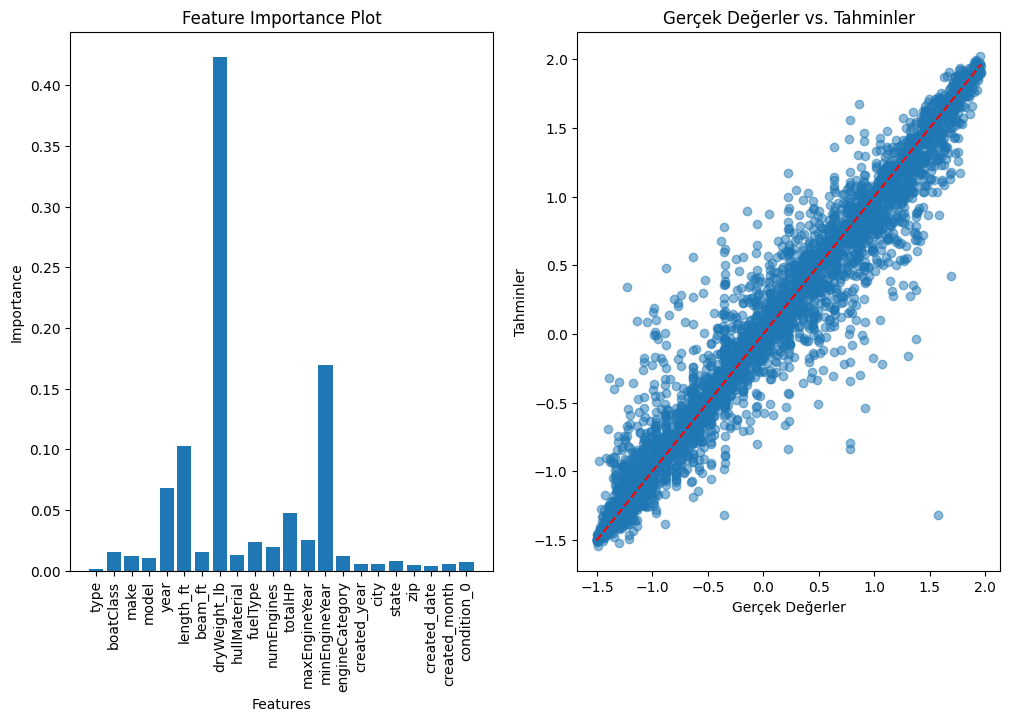

In [339]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)

plt.bar(range(len(best_model.feature_importances_)), best_model.feature_importances_)
plt.xticks(range(len(best_model.feature_importances_)), x_tr.columns, rotation=90)
plt.title("Feature Importance Plot")
plt.xlabel("Features")
plt.ylabel("Importance")


plt.subplot(1,2,2)
plt.scatter(y_ts, y_pred, alpha=0.5)
plt.plot([min(y_ts), max(y_ts)], [min(y_ts), max(y_ts)], '--', color='red')
plt.title('Gerçek Değerler vs. Tahminler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahminler')
plt.show()

Pipeline and Ensemble Model

In [351]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor

In [357]:
lgbm_param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}


# LGBM Regressor modeli oluşturma
lgbm_model = LGBMRegressor()

# GridSearchCV oluşturma
lgbm_grid_search = GridSearchCV(estimator=lgbm_model, param_grid=lgbm_param_grid, cv=3, scoring='r2')

# GridSearchCV'yi eğitme
lgbm_grid_search.fit(x_tr, y_tr)


# En iyi parametreleri ve en iyi modeli alın
best_lgbm_params = lgbm_grid_search.best_params_
best_lgbm_model = lgbm_grid_search.best_estimator_

print("En iyi LGBM parametreleri:", best_lgbm_params)
print("En iyi LGBM R2 skoru:", lgbm_grid_search.best_score_)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2731
[LightGBM] [Info] Number of data points in the train set: 9451, number of used features: 22
[LightGBM] [Info] Start training from score -0.000215
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2722
[LightGBM] [Info] Number of data points in the train set: 9451, number of used features: 22
[LightGBM] [Info] Start training from score -0.001575
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2732
[LightGBM] [Info] Number of data points in the train set: 9452, number of used features: 22
[LightGBM] [Info] Start trai

In [359]:
best_lgbm_model = LGBMRegressor(learning_rate=0.2, n_estimators=300, max_depth=7,reg_alpha=0.5,reg_lambda=0.1)
best_xgb_model = XGBRegressor(learning_rate=0.1, max_depth=7, n_estimators=1100)

# Ensemble modelini tanımlama
ensemble_model = VotingRegressor([('lgbm', best_lgbm_model), ('xgb', best_xgb_model)])

# Ensemble modelini eğitme
ensemble_model.fit(x_tr, y_tr)

# Test verileri üzerinde tahmin yapma
y_pred_ensemble = ensemble_model.predict(x_ts)

# R2 skorunu hesaplama
r2_ensemble = r2_score_func(y_ts, y_pred_ensemble)
rmse=np.sqrt(mean_squared_error(y_ts,y_pred_ensemble))

print("Ensemble R2 skoru:", r2_ensemble)
print("Ensemble Rmse:",rmse)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004932 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2778
[LightGBM] [Info] Number of data points in the train set: 14177, number of used features: 22
[LightGBM] [Info] Start training from score -0.000295
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N